In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import datetime
import pytz
import ee
from datetime import date
import folium
# import geemap
# import ipyleaflet
import matplotlib.pyplot as plt
# from geemap import cartoee
import numpy as np
import cartopy as ccrs
# import geemap.colormaps as cm
import pandas as pd
import datetime
from datetime import datetime, timedelta
from collections import OrderedDict
from calendar import monthrange

In [5]:
var_merged=pd.read_csv("D:\\Backup\\Rouhin_Lenovo\\US_project\\GEE_SEBAL_Project\\Csv_Files\\SEBAL_Results_CONUS\\US-Var_merged.csv")

## First let's see if the assumptions of hot pixel is accurate.
- Use observed data to test >LST means ET=0 and H=Rn-G


Text(0, 0.5, 'LE inst obs')

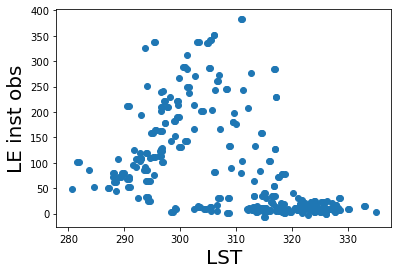

In [3]:
plt.plot(var_merged["T_LST_DEM"],var_merged["LE_y"],"o")
plt.xlabel("LST",fontsize=20)
plt.ylabel("LE inst obs",fontsize=20)

Text(0, 0.5, 'H obs')

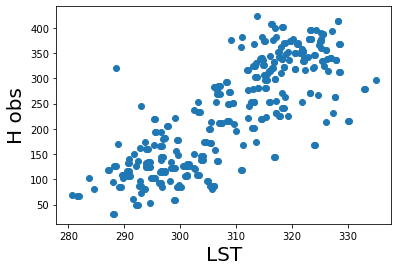

In [4]:

plt.plot(var_merged["T_LST_DEM"],var_merged["H_y"],"o")
plt.xlabel("LST",fontsize=20)
plt.ylabel("H obs",fontsize=20)

Text(0, 0.5, 'LE inst')

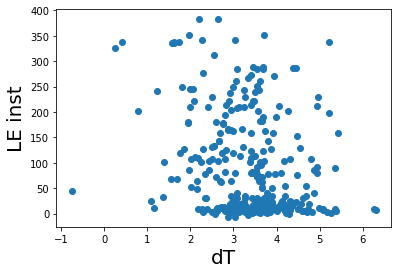

In [5]:
plt.plot(var_merged[var_merged["dT"]<10]["dT"],var_merged[var_merged["dT"]<10]["LE_y"],"o")
plt.xlabel("dT",fontsize=20)
plt.ylabel("LE inst",fontsize=20)

Text(0, 0.5, 'LE inst')

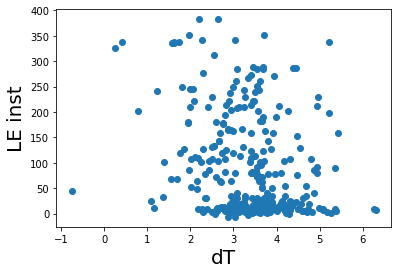

In [6]:
plt.plot(var_merged[var_merged["dT"]<10]["dT"],var_merged[var_merged["dT"]<10]["LE_y"],"o")
plt.xlabel("dT",fontsize=20)
plt.ylabel("LE inst",fontsize=20)

Text(0, 0.5, 'H inst obs')

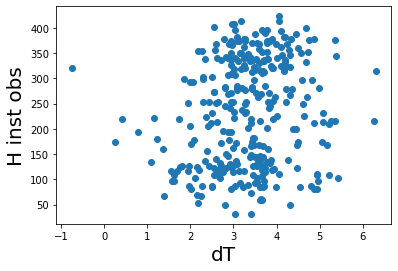

In [12]:
plt.plot(var_merged[var_merged["dT"]<10]["dT"],var_merged[var_merged["dT"]<10]["H_y"],"o")
plt.xlabel("dT",fontsize=20)
plt.ylabel("H inst obs",fontsize=20)

Text(0, 0.5, 'dT')

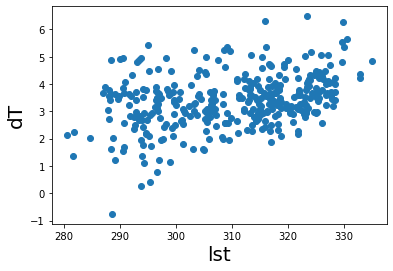

In [13]:
plt.plot(var_merged[var_merged["dT"]<10]["T_LST_DEM"],var_merged[var_merged["dT"]<10]["dT"],"o")
plt.xlabel("lst",fontsize=20)
plt.ylabel("dT",fontsize=20)

In [14]:
## What does LE error look like with cold pixel selction 

Text(0, 0.5, 'Cold Pixel temp')

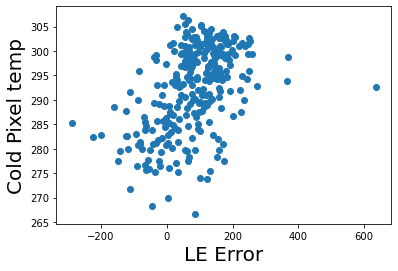

In [15]:
plt.plot(var_merged[var_merged["LE_x"]>-10]["LE_x"]-var_merged[var_merged["LE_x"]>-10]["LE_y"],var_merged[var_merged["LE_x"]>-10]["cold_pixel_temp"],"o")
plt.xlabel("LE Error",fontsize=20)
plt.ylabel("Cold Pixel temp",fontsize=20)

In [16]:
var_merged["H_x"].describe()

count    3.650000e+02
mean    -3.294710e+35
std      3.770195e+36
min     -5.713796e+37
25%      1.701464e+02
50%      2.156228e+02
75%      2.698387e+02
max      3.512721e+04
Name: H_x, dtype: float64

Text(0, 0.5, 'Cold Pixel temp')

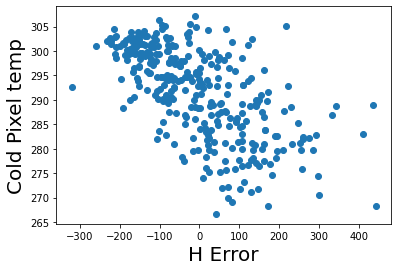

In [17]:
plt.plot(var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000)]["H_x"]-var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000)]["H_y"],var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000)]["cold_pixel_temp"],"o")
plt.xlabel("H Error",fontsize=20)
plt.ylabel("Cold Pixel temp",fontsize=20)

Text(0, 0.5, 'Hot Pixel temp')

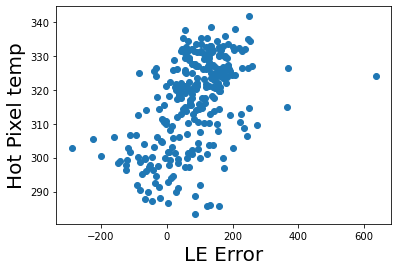

In [18]:
plt.plot(var_merged[var_merged["LE_x"]>-10]["LE_x"]-var_merged[var_merged["LE_x"]>-10]["LE_y"],var_merged[var_merged["LE_x"]>-10]["hot_pixel_temp"],"o")
plt.xlabel("LE Error",fontsize=20)
plt.ylabel("Hot Pixel temp",fontsize=20)

Text(0, 0.5, 'Hot Pixel temp')

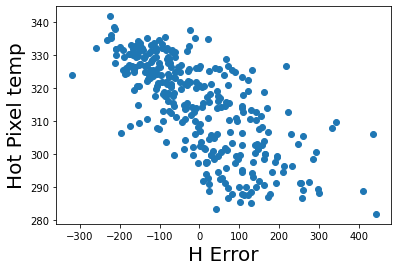

In [19]:
plt.plot(var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000)]["H_x"]-var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000)]["H_y"],var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000)]["hot_pixel_temp"],"o")
plt.xlabel("H Error",fontsize=20)
plt.ylabel("Hot Pixel temp",fontsize=20)

Text(0.5, 1.0, 'Vaira(129m)')

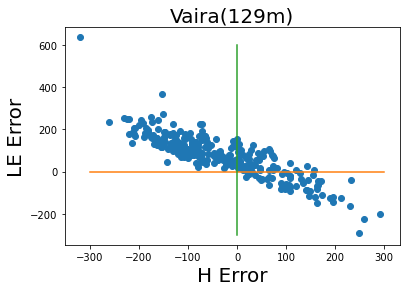

In [121]:
## BUt does less H error mean less LE error ? 
plt.plot(var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]["H_x"]-var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]["H_y"],\
         var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]["LE_x"]-var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]["LE_y"],"o")
plt.xlabel("H Error",fontsize=20)
plt.ylabel("LE Error",fontsize=20)
plt.plot(np.linspace(-300,300,5),np.linspace(0,0,5))
plt.plot(np.linspace(0,0,5),np.linspace(-300,600,5))
plt.title("Vaira(129m)",fontsize=20)

Text(0.5, 1.0, 'Vaira(129m)')

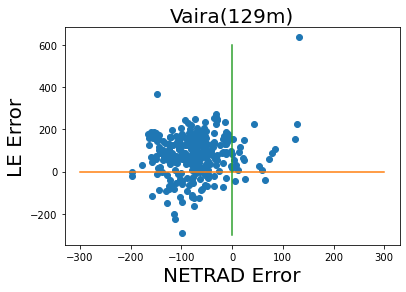

In [104]:
## BUt does less H error mean less LE error ? 
plt.plot(var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]["Rn"]-var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]["NETRAD"],\
         var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]["LE_x"]-var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]["LE_y"],"o")
plt.xlabel("NETRAD Error",fontsize=20)
plt.ylabel("LE Error",fontsize=20)
plt.plot(np.linspace(-300,300,5),np.linspace(0,0,5))
plt.plot(np.linspace(0,0,5),np.linspace(-300,600,5))
plt.title("Vaira(129m)",fontsize=20)

Text(0.5, 1.0, 'Vaira(129m)')

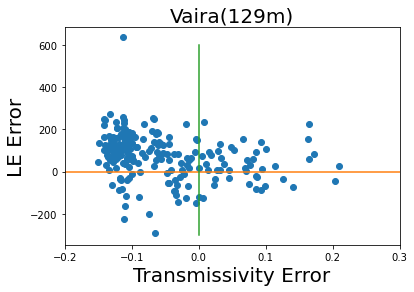

In [106]:
plt.plot(var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]["Tao_sw"]-var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]['Tao_sw_am'],\
         var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]["LE_x"]-var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]["LE_y"],"o")
plt.xlabel("Transmissivity Error",fontsize=20)
plt.ylabel("LE Error",fontsize=20)
plt.xlim(-0.2,0.3)
plt.plot(np.linspace(-300,300,5),np.linspace(0,0,5))
plt.plot(np.linspace(0,0,5),np.linspace(-300,600,5))
plt.title("Vaira(129m)",fontsize=20)

Text(0.5, 1.0, 'Vaira(129m)')

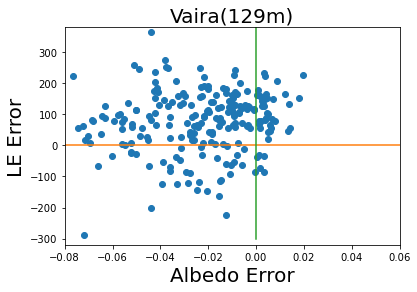

In [107]:
plt.plot(var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]["ALFA"]-var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]['Albedo'],\
         var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]["LE_x"]-var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]["LE_y"],"o")
plt.xlabel("Albedo Error",fontsize=20)
plt.ylabel("LE Error",fontsize=20)
plt.xlim(-0.08,0.06)
plt.ylim(-320,380)

plt.plot(np.linspace(-300,300,5),np.linspace(0,0,5))
plt.plot(np.linspace(0,0,5),np.linspace(-300,600,5))
plt.title("Vaira(129m)",fontsize=20)

Text(0.5, 1.0, 'Vaira(129m)')

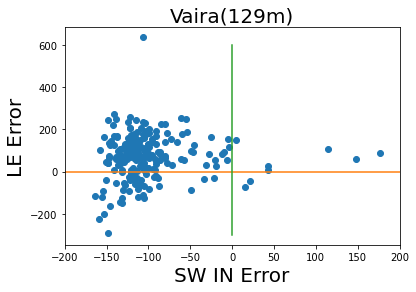

In [108]:
plt.plot(var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]["Rs_down"]-var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]['SW_IN_1_1_1'],\
         var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]["LE_x"]-var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]["LE_y"],"o")
plt.xlabel("SW IN Error",fontsize=20)
plt.ylabel("LE Error",fontsize=20)
plt.xlim(-200,200)
plt.plot(np.linspace(-300,300,5),np.linspace(0,0,5))
plt.plot(np.linspace(0,0,5),np.linspace(-300,600,5))
plt.title("Vaira(129m)",fontsize=20)

Text(0.5, 1.0, 'Vaira(129m)')

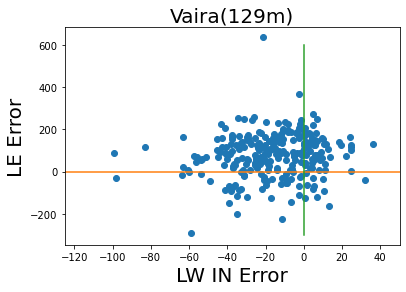

In [109]:
plt.plot(var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]["Rl_down"]-var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]['LW_IN'],\
         var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]["LE_x"]-var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]["LE_y"],"o")
plt.xlabel("LW IN Error",fontsize=20)
plt.ylabel("LE Error",fontsize=20)
plt.xlim(-125,50)
plt.plot(np.linspace(-300,300,5),np.linspace(0,0,5))
plt.plot(np.linspace(0,0,5),np.linspace(-300,600,5))
plt.title("Vaira")
plt.title("Vaira(129m)",fontsize=20)

Text(0.5, 1.0, 'Vaira(129m)')

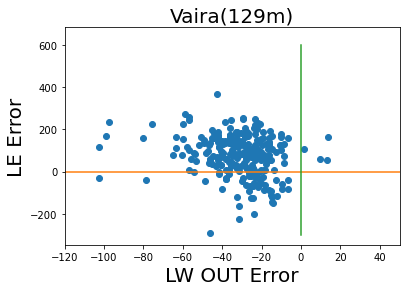

In [110]:
plt.plot(var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]["Rl_up"]-var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]['LW_OUT'],\
         var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]["LE_x"]-var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]["LE_y"],"o")
plt.xlabel("LW OUT Error",fontsize=20)
plt.ylabel("LE Error",fontsize=20)
plt.xlim(-120,50)
plt.plot(np.linspace(-300,300,5),np.linspace(0,0,5))
plt.plot(np.linspace(0,0,5),np.linspace(-300,600,5))
plt.title("Vaira(129m)",fontsize=20)

Text(0.5, 1.0, 'Vaira(129m)')

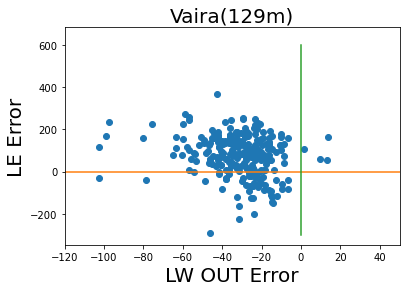

In [111]:
plt.plot(var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]["Rl_up"]-var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]['LW_OUT'],\
         var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]["LE_x"]-var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]["LE_y"],"o")
plt.xlabel("LW OUT Error",fontsize=20)
plt.ylabel("LE Error",fontsize=20)
plt.xlim(-120,50)
plt.plot(np.linspace(-300,300,5),np.linspace(0,0,5))
plt.plot(np.linspace(0,0,5),np.linspace(-300,600,5))
plt.title("Vaira(129m)",fontsize=20)

In [80]:
list(var_merged.columns)

['Unnamed: 0.1',
 'Unnamed: 0',
 'id',
 'longitude',
 'latitude',
 'date',
 'UB',
 'B',
 'GR',
 'R',
 'NIR',
 'SWIR_1',
 'SWIR_2',
 'ST_B10',
 'pixel_qa',
 'ALFA',
 'NDVI',
 'EVI',
 'SAVI',
 'T_LST',
 'LAI',
 'e_0',
 'e_NB',
 'longitude.1',
 'latitude.1',
 'NDVI_neg',
 'pos_NDVI',
 'int',
 'sd_ndvi',
 'NDWI',
 'LST_neg',
 'LST_NW',
 'T_LST_DEM',
 'LST_neg_1',
 'LST_NW_1',
 'Tao_sw',
 'EA',
 'W_ATM',
 'Rl_up',
 'Rs_down',
 'Tao_sw_1',
 'ES',
 'EA_1',
 'Rl_down',
 'Rn',
 'G',
 'zom',
 'u_fr',
 'H_x',
 'rah',
 'dT',
 'rah_first',
 'zom_1',
 'u_fr_1',
 'ufric_star',
 'ET_inst',
 'ET_24h',
 'LE_x',
 'EF',
 'id.1',
 'longitude.2',
 'latitude.2',
 'Rn24h_G',
 'AirT_G',
 'RH_G',
 'ux_G',
 'SW_Down',
 'cold_pixel_lat',
 'cold_pixel_lon',
 'cold_pixel_ndvi',
 'cold_pixel_sum',
 'cold_pixel_temp',
 'hot_pixel_sum',
 'hot_pixel_lat',
 'hot_pixel_lon',
 'hot_pixel_ndvi',
 'hot_pixel_Rn',
 'hot_pixel_G',
 'hot_pixel_temp',
 'Datetime_Local_x',
 'Datetime_GMT',
 'TIMESTAMP_START',
 'TIMESTAMP_END',
 

Text(0.5, 1.0, 'Vaira(129m)')

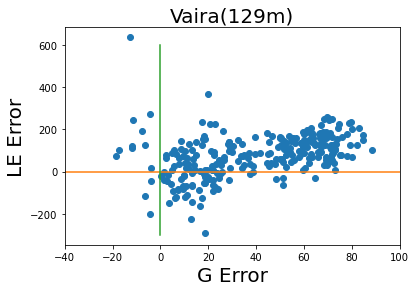

In [120]:
## BUt does less H error mean less LE error ? 
plt.plot(var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]["G"]-var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]['G_PI_1_1_A'],\
         var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]["LE_x"]-var_merged[(var_merged["H_x"]<1000) & (var_merged["H_x"]>-1000) & (var_merged["LE_x"]>-10)]["LE_y"],"o")
plt.xlabel("G Error",fontsize=20)
plt.ylabel("LE Error",fontsize=20)
plt.xlim(-40,100)
# plt.ylim(-120,50)

plt.plot(np.linspace(-300,300,5),np.linspace(0,0,5))
plt.plot(np.linspace(0,0,5),np.linspace(-300,600,5))
plt.title("Vaira(129m)",fontsize=20)

Text(0, 0.5, 'dT')

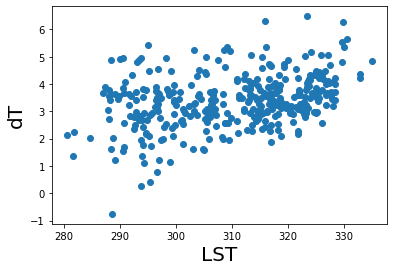

In [21]:
plt.plot(var_merged[var_merged["dT"]<10]["T_LST_DEM"],var_merged[var_merged["dT"]<10]["dT"],"o")
plt.xlabel("LST",fontsize=20)
plt.ylabel("dT",fontsize=20)

In [22]:
var_merged["AirT_G"]

0      14.882873
1      14.296402
2      14.306703
3      15.901735
4      22.629587
         ...    
360    11.030401
361    13.114196
362     6.801449
363     6.805697
364    10.371667
Name: AirT_G, Length: 365, dtype: float64

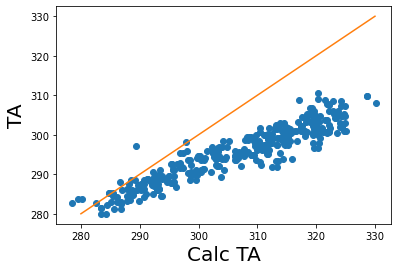

In [23]:
plt.plot(var_merged[var_merged["dT"]<10]["T_LST_DEM"]-var_merged[var_merged["dT"]<10]["dT"],var_merged[var_merged["dT"]<10]["AirT_G"]+273.16,"o")
plt.xlabel("Calc TA",fontsize=20)
plt.ylabel("TA",fontsize=20)
plt.plot(np.linspace(280,330,5),np.linspace(280,330,5))


Text(0, 0.5, 'dT')

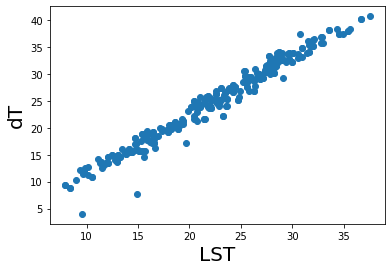

In [24]:
plt.plot(var_merged[var_merged["dT"]<10]["AirT_G"],var_merged[var_merged["dT"]<10]["TA"],"o")
plt.xlabel("LST",fontsize=20)
plt.ylabel("dT",fontsize=20)

In [25]:
## Current error in H (80 w/m2)
var_merged.iloc[290][["LE_x","LE_y","H_x","H_y","id","TA","T_LST_DEM"]]

LE_x                    77.784406
LE_y                     0.015949
H_x                    275.411769
H_y                        355.37
id           LC08_043034_20210704
TA                          29.37
T_LST_DEM              326.053745
Name: 290, dtype: object

## Influence of Pixel Selection on LE inst
1. Pick one image and randomly select hot pixel each time.(Observe what works and why) 
2. Do the same for cold pixel 

In [6]:
ee.Initialize()
import sys
sys.path.append('D:\\Backup\\Rouhin_Lenovo\\US_project\\GEE_SEBAL_Project\\geeSEBAL_copy_edits\\etbrasil\\')
import geesebal
from geesebal import (tools,landsatcollection,masks,meteorology,endmembers, 
evapotranspiration,collection,timeseries,image,ET_Collection_mod)

In [69]:
## Choosing a day when LE is terribly wrong
var_merged.iloc[290][["LE_x","LE_PI_F","H_x","H_PI_F","id","G",'G_PI_1_1_A',"NETRAD","Rn","Date","id"]]

# var_merged.iloc[2][["LE_x","LE_PI_F","H_x","H_PI_F","id","G",'G_PI_1_1_A',"NETRAD","Rn","Date","id"]]
# ls=ee.ImageCollection("LANDSAT/LC08/C02/T1_L2").filterDate("2021-07-04","2021-07-05").filterMetadata('CLOUD_COVER', 'less_than',80 ).filterMetadata('WRS_PATH', 'equals', 43).filterMetadata('WRS_ROW', 'equals',34)
# ls.first().getInfo()

LE_x                     77.784406
LE_PI_F                   0.015949
H_x                     275.411769
H_PI_F                      355.37
id            LC08_043034_20210704
G                       132.990507
G_PI_1_1_A                  58.064
NETRAD                      583.41
Rn                      486.186682
Date                    2021-07-04
id            LC08_043034_20210704
Name: 290, dtype: object

In [70]:
486-132-275

79

In [7]:
var_merged.iloc[290][["SW_IN_1_1_1","SW_OUT","LW_IN","LW_OUT","NDVI"]]
var_merged.iloc[2][["SW_IN_1_1_1","SW_OUT","LW_IN","LW_OUT","NDVI"]]

SW_IN_1_1_1      739.41
SW_OUT           138.97
LW_IN            294.87
LW_OUT           429.51
NDVI           0.582448
Name: 2, dtype: object

In [100]:
165+194+18

377

In [74]:
var_merged.columns.to_list()

['Unnamed: 0.1',
 'Unnamed: 0',
 'id',
 'longitude',
 'latitude',
 'date',
 'UB',
 'B',
 'GR',
 'R',
 'NIR',
 'SWIR_1',
 'SWIR_2',
 'ST_B10',
 'pixel_qa',
 'ALFA',
 'NDVI',
 'EVI',
 'SAVI',
 'T_LST',
 'LAI',
 'e_0',
 'e_NB',
 'longitude.1',
 'latitude.1',
 'NDVI_neg',
 'pos_NDVI',
 'int',
 'sd_ndvi',
 'NDWI',
 'LST_neg',
 'LST_NW',
 'T_LST_DEM',
 'LST_neg_1',
 'LST_NW_1',
 'Tao_sw',
 'EA',
 'W_ATM',
 'Rl_up',
 'Rs_down',
 'Tao_sw_1',
 'ES',
 'EA_1',
 'Rl_down',
 'Rn',
 'G',
 'zom',
 'u_fr',
 'H_x',
 'rah',
 'dT',
 'rah_first',
 'zom_1',
 'u_fr_1',
 'ufric_star',
 'ET_inst',
 'ET_24h',
 'LE_x',
 'EF',
 'id.1',
 'longitude.2',
 'latitude.2',
 'Rn24h_G',
 'AirT_G',
 'RH_G',
 'ux_G',
 'SW_Down',
 'cold_pixel_lat',
 'cold_pixel_lon',
 'cold_pixel_ndvi',
 'cold_pixel_sum',
 'cold_pixel_temp',
 'hot_pixel_sum',
 'hot_pixel_lat',
 'hot_pixel_lon',
 'hot_pixel_ndvi',
 'hot_pixel_Rn',
 'hot_pixel_G',
 'hot_pixel_temp',
 'Datetime_Local_x',
 'Datetime_GMT',
 'TIMESTAMP_START',
 'TIMESTAMP_END',
 

In [7]:
ls=ee.ImageCollection("LANDSAT/LC08/C02/T1_L2").filterDate("2021-07-04","2021-07-05").filterMetadata('CLOUD_COVER', 'less_than',80 ).filterMetadata('WRS_PATH', 'equals', 43).filterMetadata('WRS_ROW', 'equals',34)
# new=ls.first().addBands(ee.Image(ee.Number(4)).rename("const"))
# new.getInfo()
boxcar = ee.Kernel.square(radius=10, units='pixels', normalize= True);

# Smooth the image by convolving with the boxcar kernel.
smooth = ls.first().select("ST_B10","SR_B1").convolve(boxcar).rename(["ST_conv","SR_conv"])
# image=ls.first().addBands(smooth).rename(["ST_conv","SR_conv"])
smooth.getInfo()

{'type': 'Image',
 'bands': [{'id': 'ST_conv',
   'data_type': {'type': 'PixelType', 'precision': 'double'},
   'dimensions': [7591, 7731],
   'crs': 'EPSG:32610',
   'crs_transform': [30, 0, 601785, 0, -30, 4265715]},
  {'id': 'SR_conv',
   'data_type': {'type': 'PixelType', 'precision': 'double'},
   'dimensions': [7591, 7731],
   'crs': 'EPSG:32610',
   'crs_transform': [30, 0, 601785, 0, -30, 4265715]}],
 'id': 'LANDSAT/LC08/C02/T1_L2/LC08_043034_20210704',
 'version': 1629894549029708,
 'properties': {'DATA_SOURCE_ELEVATION': 'GLS2000',
  'WRS_TYPE': 2,
  'REFLECTANCE_ADD_BAND_1': -0.2,
  'REFLECTANCE_ADD_BAND_2': -0.2,
  'DATUM': 'WGS84',
  'REFLECTANCE_ADD_BAND_3': -0.2,
  'REFLECTANCE_ADD_BAND_4': -0.2,
  'REFLECTANCE_ADD_BAND_5': -0.2,
  'REFLECTANCE_ADD_BAND_6': -0.2,
  'REFLECTANCE_ADD_BAND_7': -0.2,
  'system:footprint': {'type': 'LinearRing',
   'coordinates': [[-119.8548144349735, 36.423005690755446],
    [-119.80896913764387, 36.41378323334567],
    [-119.80356421529437,

## Changing cold pixel selection based on convolution

In [8]:
def cold_pixel_sel(image, refpoly, p_top_NDVI, p_coldest_Ts):
  #IDENTIFY THE TOP % NDVI PIXELS
  d_perc_top_NDVI=image.select('NDVI_neg').reduceRegion(
      reducer=ee.Reducer.percentile([p_top_NDVI]),
      geometry= refpoly,
      scale= 30,
      maxPixels=9e14)

  #GET VALUE
  n_perc_top_NDVI= ee.Number(d_perc_top_NDVI.get('NDVI_neg'))
#   print(n_perc_top_NDVI.getInfo())
## Perform convolutions on NDVI and LST layers
  boxcar = ee.Kernel.square(radius=10, units='pixels', normalize= True)
  conv = image.select("T_LST_DEM","NDVI","NDVI_neg","LST_NW").convolve(boxcar).\
    rename(["LST_conv","NDVI_conv","NDVI_neg_conv","LST_NW_conv"])
  image=image.addBands(conv)  
  #UPDATE MASK WITH NDVI VALUES
  i_top_NDVI=image.updateMask(image.select('NDVI_neg_conv').lte(n_perc_top_NDVI));
  #SELECT THE COLDEST TS FROM PREVIOUS NDVI GROUP
  d_perc_low_LST = i_top_NDVI.select('LST_NW_conv').reduceRegion(
    reducer= ee.Reducer.percentile([p_coldest_Ts]),
    geometry=refpoly,
    scale= 30,
    maxPixels=9e14
    )
  #GET VALUE
  n_perc_low_LST = ee.Number(d_perc_low_LST.get('LST_NW_conv'))
  i_cold_lst = i_top_NDVI.updateMask(i_top_NDVI.select('LST_NW_conv').lte(n_perc_low_LST));
#   print(n_perc_low_LST)
  #FILTERS
  c_lst_cold20 =  i_cold_lst.updateMask(image.select('LST_NW_conv').gte(200))
  c_lst_cold20_int=c_lst_cold20.select('LST_NW_conv').int().rename('int')
  c_lst_cold20=c_lst_cold20.addBands(c_lst_cold20_int)

  #COUNT NUNMBER OF PIXELS
  count_final_cold_pix = c_lst_cold20.select('int').reduceRegion(
        reducer=  ee.Reducer.count(),
        geometry= refpoly,
        scale= 30,
        maxPixels=9e14)
  n_count_final_cold_pix = ee.Number(count_final_cold_pix.get('int'))
  def function_def_pixel(f):
    return f.setGeometry(ee.Geometry.Point([f.get('longitude'), f.get('latitude')]));

  fc_cold_pix = c_lst_cold20.stratifiedSample(1, "int", refpoly, 30).map(function_def_pixel)
  n_Ts_cold = ee.Number(fc_cold_pix.aggregate_first('LST_NW_conv'))
  n_long_cold = ee.Number(fc_cold_pix.aggregate_first('longitude'))
  n_lat_cold = ee.Number(fc_cold_pix.aggregate_first('latitude'))
  n_ndvi_cold = ee.Number(fc_cold_pix.aggregate_first('NDVI_conv'))

  #CREATE A DICTIONARY WITH THOSE RESULTS
  d_cold_pixel = ee.Dictionary({
          'temp': ee.Number(n_Ts_cold),
          'ndvi': ee.Number(n_ndvi_cold),
          'x': ee.Number(n_long_cold),
          'y': ee.Number(n_lat_cold),
          'sum': ee.Number(n_count_final_cold_pix)})

  #RETURN DICTIONARY
  return d_cold_pixel

In [9]:
def hot_pixel_sel(image, refpoly, p_lowest_NDVI, p_hottest_Ts):

  #IDENTIFY THE DOWN % NDVI PIXELS
  d_perc_down_ndvi=image.select('pos_NDVI').reduceRegion(
      reducer=ee.Reducer.percentile([p_lowest_NDVI]),
      geometry= refpoly,
      scale= 30,
      maxPixels=9e14
       );
  #GET VALUE
  n_perc_low_NDVI= ee.Number(d_perc_down_ndvi.get('pos_NDVI'))
  boxcar = ee.Kernel.square(radius=10, units='pixels', normalize= True)
  conv = image.select("T_LST_DEM","NDVI","pos_NDVI","LST_neg","LST_NW").convolve(boxcar).\
    rename(["LST_conv","NDVI_conv","pos_NDVI_conv","LST_neg_conv","LST_NW_conv"])
  image=image.addBands(conv)  
    
  #UPDATE MASK WITH NDVI VALUES
  i_low_NDVI = image.updateMask(image.select('pos_NDVI_conv').lte(n_perc_low_NDVI));

  #SELECT THE HOTTEST TS FROM PREVIOUS NDVI GROUP
  d_perc_top_lst = i_low_NDVI.select('LST_neg_conv').reduceRegion(
    reducer= ee.Reducer.percentile([p_hottest_Ts]),
    geometry=refpoly,
    scale= 30,
    maxPixels=9e14
    );

  #GET VALUE
  n_perc_top_lst = ee.Number(d_perc_top_lst.get('LST_neg_conv'))

  c_lst_hotpix = i_low_NDVI.updateMask(i_low_NDVI.select('LST_neg_conv').lte(n_perc_top_lst))

  c_lst_hotpix_int=c_lst_hotpix.select('LST_NW_conv').int().rename('int')

  #COUNT NUNMBER OF PIXELS
  count_final_hot_pix = c_lst_hotpix_int.select('int').reduceRegion(
        reducer=  ee.Reducer.count(),
        geometry= refpoly,
        scale= 30,
        maxPixels=9e14)
  n_count_final_hot_pix = ee.Number(count_final_hot_pix.get('int'))

  #SELECT HOT PIXEL RANDOMLY (FROM PREVIOUS SELECTION)
  def function_def_pixel(f):
     return f.setGeometry(ee.Geometry.Point([f.get('longitude'), f.get('latitude')]))

  fc_hot_pix = c_lst_hotpix.stratifiedSample(1, "int", refpoly, 30,seed=3).map(function_def_pixel)
  n_Ts_hot = ee.Number(fc_hot_pix.aggregate_first('LST_NW_conv'));
  n_long_hot = ee.Number(fc_hot_pix.aggregate_first('longitude'))
  n_lat_hot = ee.Number(fc_hot_pix.aggregate_first('latitude'))
  n_ndvi_hot = ee.Number(fc_hot_pix.aggregate_first('NDVI_conv'))
  n_Rn_hot = ee.Number(fc_hot_pix.aggregate_first('Rn'))
  n_G_hot = ee.Number(fc_hot_pix.aggregate_first('G'))

  #CREATE A DICTIONARY WITH THOSE RESULTS
  d_hot_pixel = ee.Dictionary({
        'temp': ee.Number(n_Ts_hot),
        'x': ee.Number(n_long_hot),
        'y': ee.Number(n_lat_hot),
        'Rn': ee.Number(n_Rn_hot),
        'G': ee.Number(n_G_hot),
        'ndvi': ee.Number(n_ndvi_hot),
        'sum': ee.Number(n_count_final_hot_pix)})

  #RETURN DICTIONARY
  return d_hot_pixel

In [17]:
df_sub["constant_1"]

0   -52.298991
Name: constant_1, dtype: float64

In [114]:
def et_collection_SR(start_date,end_date,lon,lat,scale):
#     try:
#     ls=ee.ImageCollection("LANDSAT/LC08/C02/T1_L2").filterDate(start_date,end_date).filterMetadata('WRS_PATH', 'equals', path).filterMetadata('WRS_ROW', 'equals',row).filterMetadata('CLOUD_COVER', 'less_than', 10);
    geometry=ee.Geometry.Point([lon,lat])
    ls=ee.ImageCollection("LANDSAT/LC08/C02/T1_L2").filterDate(start_date,end_date).filterMetadata('CLOUD_COVER', 'less_than',80 ).filterMetadata('WRS_PATH', 'equals', 43).filterMetadata('WRS_ROW', 'equals',34)
#     ls=ls.first()
    ls=ls.filterBounds(geometry)
    def applyScaleFactors(image):
        opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2);
        thermalBands = image.select('ST_B.*').multiply(0.00341802).add(149.0);
        return image.addBands(opticalBands, None, True).addBands(thermalBands, None, True)
    ls=ls.map(applyScaleFactors)
#    ls = ls.filter(ee.Filter.neq('system:index','LC08_038037_20210903'));
    ls_list=ls.aggregate_array('system:index').getInfo()
    print(ls_list)
    count = ls.size().getInfo()
    print("Number of scenes: ", count)
    n=0
    k=0
    lon_cold_pixel=[]
    lat_cold_pixel=[]
    ts_cold_scene=[]
    cold_pixel_lat,cold_pixel_lon,cold_pixel_ndvi,cold_pixel_temp,cold_pixel_sum=[],[],[],[],[]
    hot_pixel_lat,hot_pixel_lon,hot_pixel_ndvi,hot_pixel_temp,hot_pixel_sum=[],[],[],[],[]
    hot_pixel_Rn,hot_pixel_G=[],[]
    zenith_angle=[]
    #====== ITERATIVE PROCESS ======#
    #FOR EACH IMAGE ON THE LIST
    #ESTIMATE ET DAILY IMAGE
    while n < count:
        #GET IMAGE
#         for i in range(var_merged.shape[0]):
        image= ls.filterMetadata('system:index','equals',ls_list[n]).first()
        image.getInfo()
        image=ee.Image(image)
            # et=image.Image(image)
        NDVI_cold=5
        Ts_cold=20
        NDVI_hot=10
        Ts_hot=20
        index=image.get('system:index')
        cloud_cover=image.get('CLOUD_COVER')
        LANDSAT_ID=image.get('L1_LANDSAT_PRODUCT_ID').getInfo()
        print(LANDSAT_ID)
        landsat_version=image.get('SATELLITE').getInfo()
        sun_elevation=image.get("SUN_ELEVATION")
        print(sun_elevation.getInfo())
        time_start=image.get('system:time_start')
        date=ee.Date(time_start)
        year=ee.Number(date.get('year'))
        month=ee.Number(date.get('month'))
        day=ee.Number(date.get('day'))
        hour=ee.Number(date.get('hour'))
        minuts = ee.Number(date.get('minutes'))
        print(str(hour.getInfo())+str(minuts.getInfo()))
        crs = image.projection().crs()
        transform=ee.List(ee.Dictionary(ee.Algorithms.Describe(image.projection())).get('transform'))
        date_string=date.format('YYYY-MM-dd').getInfo()
        #ENDMEMBERS
        p_top_NDVI=ee.Number(NDVI_cold)
        p_coldest_Ts=ee.Number(Ts_cold)
        p_lowest_NDVI=ee.Number(NDVI_hot)
        p_hottest_Ts=ee.Number(Ts_hot)
        ls_trial=image.select([0,1,2,3,4,5,6,8,17], ["UB","B","GR","R","NIR","SWIR_1","SWIR_2","ST_B10","pixel_qa"])
#       ls.first_toa=ee.Image('LANDSAT/LC08/C01/T1/'+index.getInfo())
        print(ls_trial.bandNames().getInfo())

#col_rad = ee.Algorithms.Landsat.calibratedRadiance(ls.first_toa)
#col_rad = ls_trial.addBands(col_rad.select([9],["T_RAD"]))
#CLOUD REMOVAL
#ls_trial=ee.ImageCollection(col_rad).map(masks.f_cloudMaskL8_SR)
        ls_trial=masks.f_cloudMaskL8_SR(ls_trial)
#         print("Cloud masking Complete")
        print(ls_trial.bandNames().getInfo())

        #ALBEDO TASUMI ET AL. (2008) METHOD WITH KE ET AL. (2016) COEFFICIENTS
        # ls_trial=ls_trial.map(masks.f_albedoL8)
        ls_trial=masks.f_albedoL8(ls_trial)
        print(ls_trial.bandNames().getInfo())
#         print("Albedo calc done")

        #------ Meteorology
          #GEOMETRY
        geometryReducer=ls_trial.geometry().bounds().getInfo()
#         print("sun elevation check")

        geometry_download=geometryReducer['coordinates']

        # camada_clip=ls_trial.select('BRT').first()
#         camada_clip=ls_trial.select('BRT')
#         sun_elevation=ee.Number(90).subtract(ee.Number(azimuth_angle))
        print(sun_elevation.getInfo())
        #METEOROLOGY PARAMETERS
        col_meteorology= meteorology.get_meteorology(ls_trial,time_start);
        #AIR TEMPERATURE [C]
        T_air = col_meteorology.select('AirT_G');
        #WIND SPEED [M S-1]
        ux= col_meteorology.select('ux_G');
        #RELATIVE HUMIDITY [%]
        UR = col_meteorology.select('RH_G');
        #NET RADIATION 24H [W M-2]
        Rn24hobs = col_meteorology.select('Rn24h_G');

## print("Metorology ready")

        #------
        #------ Elevation
        #SRTM DATA ELEVATION
        SRTM_ELEVATION ='USGS/SRTMGL1_003'
        srtm = ee.Image(SRTM_ELEVATION).clip(geometryReducer);
        z_alt = srtm.select('elevation')
## print(z_alt) 
        ls_trial=tools.fexp_spec_ind(ls_trial)
        ls_trial=tools.LST_DEM_correction(ls_trial, z_alt, T_air, UR,sun_elevation,hour,minuts)
        print("It's a miracle")
## GET IMAGE
## COLD PIXEL
#         d_cold_pixel=cold_pixel_sel(ls_trial, geometryReducer, p_top_NDVI, p_coldest_Ts)
        d_cold_pixel=endmembers.fexp_cold_pixel(ls_trial, geometryReducer, p_top_NDVI, p_coldest_Ts)

        print(d_cold_pixel.getInfo())
## COLD PIXEL NUMBER
        n_Ts_cold = ee.Number(d_cold_pixel.get('temp').getInfo())

#         n_Ts_cold = ee.Number(var_merged.iloc[290]['cold_pixel_temp'])
##INSTANTANEOUS OUTGOING LONG-WAVE RADIATION [WM-2]
        ls_trial=tools.fexp_radlong_up(ls_trial)
##INSTANTANEOUS INCOMING SHORT-WAVE RADIATION [WM-2]
        ls_trial=tools.fexp_radshort_down(ls_trial,z_alt,T_air,UR, sun_elevation)

## INSTANTANEOUS INCOMING LONGWAVE RADIATION [W M-2]
        ls_trial=tools.fexp_radlong_down(ls_trial, n_Ts_cold)
##INSTANTANEOUS NET RADIATON BALANCE [W M-2]

        ls_trial=tools.fexp_radbalance(ls_trial)

##SOIL HEAT FLUX (G) [W M-2]
        ls_trial=tools.fexp_soil_heat(ls_trial)
##HOT PIXEL
        d_hot_pixel=endmembers.fexp_hot_pixel(ls_trial, geometryReducer,p_lowest_NDVI, p_hottest_Ts)
#         d_hot_pixel=hot_pixel_sel(ls_trial, geometryReducer,p_lowest_NDVI, p_hottest_Ts)

##SENSIBLE HEAT FLUX (H) [W M-2]
        ls_trial=tools.fexp_sensible_heat_flux(ls_trial, ux, UR,Rn24hobs,n_Ts_cold,
                                       d_hot_pixel, date_string,geometryReducer)

##DAILY EVAPOTRANSPIRATION (ET_24H) [MM DAY-1]
        ls_trial=evapotranspiration.fexp_et(ls_trial,Rn24hobs)
## Store all the values of the cold pixel 
## Store all the values of the cold pixel 
        cold_pixel_lat.append(d_cold_pixel.get("y").getInfo())
        cold_pixel_lon.append(d_cold_pixel.get("x").getInfo())
        cold_pixel_temp.append(d_cold_pixel.get("temp").getInfo())
        cold_pixel_ndvi.append(d_cold_pixel.get("ndvi").getInfo())
        cold_pixel_sum.append(d_cold_pixel.get("sum").getInfo())
## Get info about hot pixl
        hot_pixel_lat.append(d_hot_pixel.get("y").getInfo())
        hot_pixel_lon.append(d_hot_pixel.get("x").getInfo())
        hot_pixel_temp.append(d_hot_pixel.get("temp").getInfo())
        hot_pixel_ndvi.append(d_hot_pixel.get("ndvi").getInfo())
        hot_pixel_sum.append(d_hot_pixel.get("sum").getInfo())
        hot_pixel_Rn.append(d_hot_pixel.get("Rn").getInfo())
        hot_pixel_G.append(d_hot_pixel.get("G").getInfo())
        zenith_angle.append(90-sun_elevation.getInfo())

        NAME_FINAL=LANDSAT_ID[:5]+LANDSAT_ID[10:17]+LANDSAT_ID[17:25]
        if k ==0:
            new_ls=ee.List([])
            met=ee.List([])
            new_ls=new_ls.add(ls_trial)
            met=met.add(col_meteorology.select("Rn24h_G","AirT_G","RH_G","ux_G","SW_Down"))
        else:
            new_ls=new_ls.add(ls_trial)
            met=met.add(col_meteorology.select("Rn24h_G","AirT_G","RH_G","ux_G","SW_Down"))
        k=k+1
        print(k)
        n=n+1
        print(n)
        ## Convert to dataframe 
        et_collection=ee.ImageCollection(new_ls)
        met_collection=ee.ImageCollection(met)

        ##Stuff t

        region = et_collection.getRegion(geometry, int(scale)).getInfo()
        era5_met=met_collection.getRegion(geometry, int(scale)).getInfo()
#     except:
#         return pd.DataFrame()
#       print('Value = %0.2f'%region[1][4])
# stuff the values in a dataframe for convenience      
    df = pd.DataFrame.from_records(region[1:len(region)])
    df_met = pd.DataFrame.from_records(era5_met[1:len(era5_met)])

    if df.shape == (0,0):
        return pd.DataFrame()
    else:

        # use the first list item as column names
        df.columns = region[0]
        df_met.columns=era5_met[0]
        df_met=df_met.drop(["time"],axis=1)
        print(df_met)
        df=pd.concat([df,df_met],axis=1)
#         cold_pixel_lat,cold_pixel_lon,cold_pixel_ndvi,cold_pixel_temp,cold_pixel_sum
        df["cold_pixel_lat"]=cold_pixel_lat
        df["cold_pixel_lon"]=cold_pixel_lon
        df["cold_pixel_ndvi"]=cold_pixel_ndvi
        df["cold_pixel_sum"]=cold_pixel_sum
        df["cold_pixel_temp"]=cold_pixel_temp

## Hot pixel
        df["hot_pixel_sum"]=hot_pixel_sum
        df["hot_pixel_lat"]=hot_pixel_lat
        df["hot_pixel_lon"]=hot_pixel_lon
        df["hot_pixel_ndvi"]=hot_pixel_ndvi
        df["hot_pixel_Rn"]=hot_pixel_Rn
        df["hot_pixel_G"]=hot_pixel_G
        df["hot_pixel_temp"]=hot_pixel_temp
        df.time = df.time / 1000
        df['time'] = pd.to_datetime(df['time'], unit = 's')
        df.rename(columns = {'time': 'date'}, inplace = True)
        df.sort_values(by = 'date')
        return df
# wet_hotcold_conv=et_collection_SR("2015-02-26","2015-02-27",-120.950922,38.413354,30)


In [115]:
#Call conv hot pixel selection 
# df_hotconv=et_collection_SR("2021-07-04","2021-07-05",-120.950922,38.413354,30)
# df_hotcold_conv=et_collection_SR("2021-07-04","2021-07-05",-120.950922,38.413354,30)
# wet_hot_conv=et_collection_SR("2015-02-26","2015-02-27",-120.950922,38.413354,30) # this was cold
# wet_cold_conv=et_collection_SR("2015-02-26","2015-02-27",-120.950922,38.413354,30)
wet_std_conv=et_collection_SR("2015-02-26","2015-02-27",-120.950922,38.413354,30)


['LC08_043034_20150226']
Number of scenes:  1
LC08_L1TP_043034_20150226_20200909_02_T1
38.76677135
1839
['UB', 'B', 'GR', 'R', 'NIR', 'SWIR_1', 'SWIR_2', 'ST_B10', 'pixel_qa']
['UB', 'B', 'GR', 'R', 'NIR', 'SWIR_1', 'SWIR_2', 'ST_B10', 'pixel_qa']
['UB', 'B', 'GR', 'R', 'NIR', 'SWIR_1', 'SWIR_2', 'ST_B10', 'pixel_qa', 'ALFA']
38.76677135
It's a miracle
{'ndvi': 0.8547897934913635, 'sum': 454730, 'temp': 285.1910069, 'x': -121.14435793044964, 'y': 37.926466597492016}
1
1
  id   longitude   latitude    Rn24h_G     AirT_G       RH_G      ux_G  \
0  0 -120.950922  38.413354  91.947238  14.306703  62.253076  1.602036   

     SW_Down  
0  202.55761  


In [73]:
df_hotcold_conv.columns

Index(['id', 'longitude', 'latitude', 'date', 'UB', 'B', 'GR', 'R', 'NIR',
       'SWIR_1', 'SWIR_2', 'ST_B10', 'pixel_qa', 'ALFA', 'NDVI', 'EVI', 'SAVI',
       'T_LST', 'LAI', 'e_0', 'e_NB', 'longitude', 'latitude', 'NDVI_neg',
       'pos_NDVI', 'int', 'sd_ndvi', 'NDWI', 'LST_neg', 'LST_NW', 'T_LST_DEM',
       'LST_neg_1', 'LST_NW_1', 'Tao_sw', 'EA', 'W_ATM', 'Rl_up', 'Rs_down',
       'Tao_sw_1', 'ES', 'EA_1', 'Rl_down', 'Rn', 'G', 'zom', 'u_fr', 'H',
       'rah', 'dT', 'rah_first', 'zom_1', 'u_fr_1', 'ufric_star', 'constant',
       'constant_1', 'ET_inst', 'ET_24h', 'LE', 'EF', 'id', 'longitude',
       'latitude', 'Rn24h_G', 'AirT_G', 'RH_G', 'ux_G', 'SW_Down',
       'cold_pixel_lat', 'cold_pixel_lon', 'cold_pixel_ndvi', 'cold_pixel_sum',
       'cold_pixel_temp', 'hot_pixel_sum', 'hot_pixel_lat', 'hot_pixel_lon',
       'hot_pixel_ndvi', 'hot_pixel_Rn', 'hot_pixel_G', 'hot_pixel_temp'],
      dtype='object')

In [117]:
wet_std_conv[["H","LE","Rl_down","Rn","G",'hot_pixel_lat', 'hot_pixel_lon',
       'hot_pixel_ndvi', 'hot_pixel_Rn', 'hot_pixel_G', 'hot_pixel_temp',"hot_pixel_sum","cold_pixel_lat","cold_pixel_lon","cold_pixel_sum","cold_pixel_temp","cold_pixel_ndvi"]]

,H,LE,Rl_down,Rn,G,hot_pixel_lat,hot_pixel_lon,hot_pixel_ndvi,hot_pixel_Rn,hot_pixel_G,hot_pixel_temp,hot_pixel_sum,cold_pixel_lat,cold_pixel_lon,cold_pixel_sum,cold_pixel_temp,cold_pixel_ndvi
0,180.136067,197.602788,287.60193,417.419359,39.680505,36.783336,-120.575292,0.096865,358.929917,52.920446,302.038427,757126,37.926467,-121.144358,454730,285.191007,0.85479


In [118]:
wet_cold_conv[["H","LE","Rl_down","Rn","G",'hot_pixel_lat', 'hot_pixel_lon',
       'hot_pixel_ndvi', 'hot_pixel_Rn', 'hot_pixel_G', 'hot_pixel_temp',"hot_pixel_sum","cold_pixel_lat","cold_pixel_lon","cold_pixel_sum","cold_pixel_temp","cold_pixel_ndvi"]]

,H,LE,Rl_down,Rn,G,hot_pixel_lat,hot_pixel_lon,hot_pixel_ndvi,hot_pixel_Rn,hot_pixel_G,hot_pixel_temp,hot_pixel_sum,cold_pixel_lat,cold_pixel_lon,cold_pixel_sum,cold_pixel_temp,cold_pixel_ndvi
0,185.05078,192.688075,287.60193,417.419359,39.680505,36.783336,-120.575292,0.133222,358.929917,52.920446,301.537583,339320,37.926467,-121.144358,454730,285.191007,0.85479


In [119]:
wet_hot_conv[["H","LE","Rl_down","Rn","G",'hot_pixel_lat', 'hot_pixel_lon',
       'hot_pixel_ndvi', 'hot_pixel_Rn', 'hot_pixel_G', 'hot_pixel_temp',"hot_pixel_sum","cold_pixel_lat","cold_pixel_lon","cold_pixel_sum","cold_pixel_temp","cold_pixel_ndvi"]]

,H,LE,Rl_down,Rn,G,hot_pixel_lat,hot_pixel_lon,hot_pixel_ndvi,hot_pixel_Rn,hot_pixel_G,hot_pixel_temp,hot_pixel_sum,cold_pixel_lat,cold_pixel_lon,cold_pixel_sum,cold_pixel_temp,cold_pixel_ndvi
0,198.589237,166.657361,273.155466,403.614823,38.368225,36.783336,-120.575292,0.096865,345.222793,50.899475,302.038427,757126,38.026884,-120.030811,68881,281.540159,0.8588


In [107]:
wet_hotcold_conv[["H","LE","Rl_down","Rn","G",'hot_pixel_lat', 'hot_pixel_lon',
       'hot_pixel_ndvi', 'hot_pixel_Rn', 'hot_pixel_G', 'hot_pixel_temp',"hot_pixel_sum","cold_pixel_lat","cold_pixel_lon","cold_pixel_sum"]]

,H,LE,Rl_down,Rn,G,hot_pixel_lat,hot_pixel_lon,hot_pixel_ndvi,hot_pixel_Rn,hot_pixel_G,hot_pixel_temp,hot_pixel_sum,cold_pixel_lat,cold_pixel_lon,cold_pixel_sum
0,202.995482,162.251116,273.155466,403.614823,38.368225,36.783336,-120.575292,0.133222,345.222793,50.899475,301.537583,339320,38.026884,-120.030811,68881


In [80]:
df_hotcold_conv[["H","LE","Rl_down","Rn","G",'hot_pixel_lat', 'hot_pixel_lon',
       'hot_pixel_ndvi', 'hot_pixel_Rn', 'hot_pixel_G', 'hot_pixel_temp',"hot_pixel_sum","cold_pixel_lat","cold_pixel_lon","cold_pixel_sum"]]

,H,LE,Rl_down,Rn,G,hot_pixel_lat,hot_pixel_lon,hot_pixel_ndvi,hot_pixel_Rn,hot_pixel_G,hot_pixel_temp,hot_pixel_sum,cold_pixel_lat,cold_pixel_lon,cold_pixel_sum
0,258.954306,93.067131,356.611674,484.569616,132.548178,37.700227,-121.510028,0.15488,429.501918,134.109158,332.523748,579611,37.907231,-119.898148,67969


In [120]:
# # df_hotcold_conv.to_csv("C:\\Rouhin_Lenovo\\US_project\\GEE_SEBAL_Project\\Csv_Files\\Sensitivity\\Pixel_Results_LC_\\hotcold_conv_4-7-21.csv")
# df_hotconv.to_csv("C:\\Rouhin_Lenovo\\US_project\\GEE_SEBAL_Project\\Csv_Files\\Sensitivity\\Pixel_Results_LC_\\hot_conv_4-7-21.csv")
# df_conv.to_csv("C:\\Rouhin_Lenovo\\US_project\\GEE_SEBAL_Project\\Csv_Files\\Sensitivity\\Pixel_Results_LC_\\cold_conv_4-7-21.csv")
# df_sub.to_csv("C:\\Rouhin_Lenovo\\US_project\\GEE_SEBAL_Project\\Csv_Files\\Sensitivity\\Pixel_Results_LC_\\stand_conv_4-7-21.csv")
wet_hotcold_conv.to_csv("C:\\Rouhin_Lenovo\\US_project\\GEE_SEBAL_Project\\Csv_Files\\Sensitivity\\Pixel_Results_LC_\\hotcold_conv_wet_26-2-15.csv")
wet_cold_conv.to_csv("C:\\Rouhin_Lenovo\\US_project\\GEE_SEBAL_Project\\Csv_Files\\Sensitivity\\Pixel_Results_LC_\\hot_conv_wet_26-2-15.csv")
wet_hot_conv.to_csv("C:\\Rouhin_Lenovo\\US_project\\GEE_SEBAL_Project\\Csv_Files\\Sensitivity\\Pixel_Results_LC_\\cold_conv_wet_26-2-15.csv")
wet_std_conv.to_csv("C:\\Rouhin_Lenovo\\US_project\\GEE_SEBAL_Project\\Csv_Files\\Sensitivity\\Pixel_Results_LC_\\stand_conv_wet_26-2-15.csv")

In [78]:
df_hotconv[["H","LE","Rl_down","Rn","G",'hot_pixel_lat', 'hot_pixel_lon',
       'hot_pixel_ndvi', 'hot_pixel_Rn', 'hot_pixel_G', 'hot_pixel_temp',"hot_pixel_sum"]]

,H,LE,Rl_down,Rn,G,hot_pixel_lat,hot_pixel_lon,hot_pixel_ndvi,hot_pixel_Rn,hot_pixel_G,hot_pixel_temp,hot_pixel_sum
0,256.401039,96.795136,358.309437,486.186682,132.990507,37.700227,-121.510028,0.186183,431.117594,134.613643,332.876385,579611


In [81]:
df_conv[["H","LE","Rl_down","Rn","G",'hot_pixel_lat', 'hot_pixel_lon',
       'hot_pixel_ndvi', 'hot_pixel_Rn', 'hot_pixel_G', 'hot_pixel_temp',"hot_pixel_sum","cold_pixel_sum"]]

,H,LE,Rl_down,Rn,G,hot_pixel_lat,hot_pixel_lon,hot_pixel_ndvi,hot_pixel_Rn,hot_pixel_G,hot_pixel_temp,hot_pixel_sum,cold_pixel_sum
0,252.177147,53.98491,290.334422,421.442601,115.280544,37.700227,-121.510028,0.15488,366.4292,114.415116,332.523748,846502,46381


In [67]:
df_sub[["H","LE","Rl_down","Rn","G",'hot_pixel_lat', 'hot_pixel_lon',
       'hot_pixel_ndvi', 'hot_pixel_Rn', 'hot_pixel_G', 'hot_pixel_temp',"hot_pixel_sum","cold_pixel_sum"]]

,H,LE,Rl_down,Rn,G,hot_pixel_lat,hot_pixel_lon,hot_pixel_ndvi,hot_pixel_Rn,hot_pixel_G,hot_pixel_temp,hot_pixel_sum
0,258.69765,94.498525,358.309437,486.186682,132.990507,37.700227,-121.510028,0.15488,431.117594,134.613643,332.523748,846502


In [44]:
var_merged.iloc[290][["SW_IN_1_1_1","SW_OUT","LW_IN","LW_OUT","NETRAD","H_y","H_x","LE_y","G"]]

SW_IN_1_1_1        1041.2
SW_OUT             190.66
LW_IN              359.37
LW_OUT             626.54
NETRAD             583.41
H_y                355.37
H_x            275.411769
LE_y             0.015949
G              132.990507
Name: 290, dtype: object

In [32]:
df_sub=et_collection_SR("2021-07-04","2021-07-05",-120.950922,38.413354,30)

['LC08_043034_20210704']
Number of scenes:  1
LC08_L1TP_043034_20210704_20210713_02_T1
66.25656843
1839
['UB', 'B', 'GR', 'R', 'NIR', 'SWIR_1', 'SWIR_2', 'ST_B10', 'pixel_qa']
['UB', 'B', 'GR', 'R', 'NIR', 'SWIR_1', 'SWIR_2', 'ST_B10', 'pixel_qa']
['UB', 'B', 'GR', 'R', 'NIR', 'SWIR_1', 'SWIR_2', 'ST_B10', 'pixel_qa', 'ALFA']
66.25656843
It's a miracle
{'ndvi': 0.8236871361732483, 'sum': 518004, 'temp': 302.4349178, 'x': -121.41091252308432, 'y': 38.25885351694345}
1
1
  id   longitude   latitude     Rn24h_G     AirT_G       RH_G      ux_G  \
0  0 -120.950922  38.413354  205.197443  27.206861  35.343263  1.538537   

      SW_Down  
0  354.367201  


In [35]:
 def call_et_func(lon,lat,start_date,end_date,scale):
        concat=pd.DataFrame()
        for i in range(10):
                try:
                    df_sub=et_collection_SR(start_date,end_date,lon,lat,scale)
                    concat = pd.concat([concat, df_sub], axis = 0) 
                except NameError:
                    print("Error: check input parameters")
        return concat
hot_pixie=call_et_func(-120.950922,38.413354,"2021-07-04","2021-07-05",30)

['LC08_043034_20210704']
Number of scenes:  1
LC08_L1TP_043034_20210704_20210713_02_T1
66.25656843
1839
['UB', 'B', 'GR', 'R', 'NIR', 'SWIR_1', 'SWIR_2', 'ST_B10', 'pixel_qa']
['UB', 'B', 'GR', 'R', 'NIR', 'SWIR_1', 'SWIR_2', 'ST_B10', 'pixel_qa']
['UB', 'B', 'GR', 'R', 'NIR', 'SWIR_1', 'SWIR_2', 'ST_B10', 'pixel_qa', 'ALFA']
66.25656843
It's a miracle


ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [21]:
# =et_collection_SR("2015-07-01","2015-07-15",-120.9509216,38.41335394,30,"Albedo",[0.85,0.9,1,1.05,1.15])
hot_pixie

,id,longitude,latitude,date,UB,B,GR,R,NIR,SWIR_1,...,RH_G,ux_G,SW_Down,hot_pixel_sum,hot_pixel_lat,hot_pixel_lon,hot_pixel_ndvi,hot_pixel_Rn,hot_pixel_G,hot_pixel_temp
0,LC08_043034_20210704,-120.950922,38.413354,2021-07-04 18:39:48.043000064,0.04926,0.064605,0.101372,0.158875,0.298465,0.383275,...,35.343263,1.538537,354.367201,846502,36.858695,-120.913087,0.183249,443.798301,135.065488,332.058897
0,LC08_043034_20210704,-120.950922,38.413354,2021-07-04 18:39:48.043000064,0.04926,0.064605,0.101372,0.158875,0.298465,0.383275,...,35.343263,1.538537,354.367201,846502,36.858695,-120.913087,0.183249,443.798301,135.065488,332.058897
0,LC08_043034_20210704,-120.950922,38.413354,2021-07-04 18:39:48.043000064,0.04926,0.064605,0.101372,0.158875,0.298465,0.383275,...,35.343263,1.538537,354.367201,846502,36.858695,-120.913087,0.183249,443.798301,135.065488,332.058897
0,LC08_043034_20210704,-120.950922,38.413354,2021-07-04 18:39:48.043000064,0.04926,0.064605,0.101372,0.158875,0.298465,0.383275,...,35.343263,1.538537,354.367201,846502,36.858695,-120.913087,0.183249,443.798301,135.065488,332.058897
0,LC08_043034_20210704,-120.950922,38.413354,2021-07-04 18:39:48.043000064,0.04926,0.064605,0.101372,0.158875,0.298465,0.383275,...,35.343263,1.538537,354.367201,846502,36.858695,-120.913087,0.183249,443.798301,135.065488,332.058897
0,LC08_043034_20210704,-120.950922,38.413354,2021-07-04 18:39:48.043000064,0.04926,0.064605,0.101372,0.158875,0.298465,0.383275,...,35.343263,1.538537,354.367201,846502,36.858695,-120.913087,0.183249,443.798301,135.065488,332.058897
0,LC08_043034_20210704,-120.950922,38.413354,2021-07-04 18:39:48.043000064,0.04926,0.064605,0.101372,0.158875,0.298465,0.383275,...,35.343263,1.538537,354.367201,846502,36.858695,-120.913087,0.183249,443.798301,135.065488,332.058897
0,LC08_043034_20210704,-120.950922,38.413354,2021-07-04 18:39:48.043000064,0.04926,0.064605,0.101372,0.158875,0.298465,0.383275,...,35.343263,1.538537,354.367201,846502,36.858695,-120.913087,0.183249,443.798301,135.065488,332.058897
0,LC08_043034_20210704,-120.950922,38.413354,2021-07-04 18:39:48.043000064,0.04926,0.064605,0.101372,0.158875,0.298465,0.383275,...,35.343263,1.538537,354.367201,846502,36.858695,-120.913087,0.183249,443.798301,135.065488,332.058897
0,LC08_043034_20210704,-120.950922,38.413354,2021-07-04 18:39:48.043000064,0.04926,0.064605,0.101372,0.158875,0.298465,0.383275,...,35.343263,1.538537,354.367201,846502,36.858695,-120.913087,0.183249,443.798301,135.065488,332.058897


### Changing Ts hot based on observations
Idea is to minimize H inst error and backcalcuate Tscold for initialization and then proceed with the normal iterations using new Tscold. 

In the process we could also setup rah.
* This does not affect LWIN because Ts cold is only changed in the H function 


In [65]:
def H_backcalculate(image, ux, UR, Rn24hobs, n_Ts_cold, d_hot_pixel, date_string, refpoly,Hobs,st_geometry):
#     Hobs=ee.Number(Hobs)
    print(1)
    #VEGETATION HEIGHTS  [M]
    n_veg_hight = ee.Number(3)

    #WIND SPEED AT HEIGHT Zx [M]
    n_zx = ee.Number(2)

    #BLENDING HEIGHT [M]
    n_hight = ee.Number(200)

    #AIR SPECIFIC HEAT [J kg-1/K-1]
    n_Cp = ee.Number(1004)

    #VON KARMAN'S CONSTANT
    n_K = ee.Number(0.41)

    #TS COLD PIXEL
    n_Ts_cold = ee.Number(n_Ts_cold)
    #TS HOT PIXEL
    n_Ts_hot = ee.Number(d_hot_pixel.get('temp'))
    #G HOT PIXEL
    n_G_hot = ee.Number(d_hot_pixel.get('G').getInfo())
    #RN HOT PIXEL
    n_Rn_hot = ee.Number(d_hot_pixel.get('Rn').getInfo())
    #LAT AND LON HOT PIXEL
    n_long_hot = ee.Number(d_hot_pixel.get('x').getInfo())
    n_lat_hot = ee.Number(d_hot_pixel.get('y').getInfo())
    #POINT GEOMETRY
    p_hot_pix =  ee.Geometry.Point([n_long_hot, n_lat_hot])

    #SAVI
    i_savi = image.select('SAVI')

    #MOMENTUM ROUGHNESS LENGHT (ZOM) AT THE WEATHER STATION [M]
    #BRUTSAERT (1982)
    n_zom =  n_veg_hight.multiply(0.12)

    #FRICTION VELOCITY AT WEATHER STATION [M S-1]
    i_ufric_ws = i_savi.expression(
      '(n_K * ux)/ log(n_zx /n_zom)', {
              'n_K': n_K,
              'n_zx': n_zx,
              'n_zom': n_zom,
              'ux': ux }).rename('ufric_ws')

    #WIND SPEED AT BLENDING HEIGHT AT THE WEATHER STATION [M S-1]
    i_u200 = i_savi.expression(
      'i_ufric_ws *  (log(n_hight/n_zom)/n_K)', {
              'i_ufric_ws' : i_ufric_ws,
              'n_hight' : n_hight,
              'n_zom' : n_zom,
              'n_K' : n_K}).rename('i_u200')

    #MOMENTUM ROUGHNESS LENGHT (ZOM) FOR EACH PIXEL [M]
    i_zom = i_savi.expression(
     'exp((5.62 * (SAVI))-5.809)', {
              'SAVI' : i_savi,}).rename('zom')
    #ADD BAND
    image=image.addBands(i_zom.select('zom'))

    #FRICTION VELOCITY FOR EACH PIXEL  [M S-1]
    i_ufric = i_savi.expression(
      '(n_K *u200) /(log(hight/i_zom))', {
              'u200' : i_u200,
              'hight': n_hight,
              'i_zom':i_zom,
              'n_K': n_K }).rename('u_fr')
    #ADD BAND
    image=image.addBands(i_ufric.select('u_fr'))

    #AERODYNAMIC RESISTANCE TO HEAT TRANSPORT (rah) [S M-1]

    #Z1 AND Z2 ARE HEIGHTS [M] ABOVE THE ZERO PLANE DISPLACEMENT
    #OF THE VEGETATION
    z1= ee.Number(0.1);
    z2= ee.Number(2);
    i_rah = i_ufric.expression(
      '(log(z2/z1))/(i_ufric*0.41)', {
              'z2' : z2,
              'z1': z1,
              'i_ufric':i_ufric }).rename('rah')

    i_rah_first = i_rah.rename('rah_first')
    rah_pixel=i_rah_first.reduceRegion(
        reducer= ee.Reducer.first(),
       geometry= st_geometry,
        scale= 30,
        maxPixels=9000000000)
    rah_pixel=ee.Number(rah_pixel.get('rah_first'))
    #AIR DENSITY HOT PIXEL
    n_ro_hot= (ee.Number(-0.0046).multiply(n_Ts_hot)).add(ee.Number(2.5538))
    print(2)
    # Setup value using observed H
    Ts_st = image.select("T_LST_DEM").reduceRegion(
        reducer= ee.Reducer.first(),
       geometry= st_geometry,
        scale= 30,
        maxPixels=9000000000)
    Ts_st=ee.Number(Ts_st.get('T_LST_DEM'))
    print(3)
#     print(Ts_st)
    rho_st=(ee.Number(-0.0048).multiply(Ts_st)).add(ee.Number(2.5538))
    print(4)
    x=(ee.Number(Hobs).multiply(rah_pixel)).divide(rho_st.multiply(1004))
    print(5)
       

    #========ITERATIVE PROCESS=========#

    #SENSIBLE HEAT FLUX AT THE HOT PIXEL (H_hot)
    n_H_hot = ee.Number(n_Rn_hot).subtract(ee.Number(n_G_hot))

    #ITERATIVE VARIABLES
    n= ee.Number(1)
    n_dif= ee.Number(1)
    n_dif_min = ee.Number(0.1)
    list_dif = ee.List([])
    list_dT_hot = ee.List([])
    list_rah_hot = ee.List([])
    list_coef_a = ee.List([])
    list_coef_b = ee.List([])

    #NUMBER OF ITERATIVE STEPS: 15
    #CAN BE CHANGED, BUT BE AWARE THAT
    #A MINIMUM NUMBER OF ITERATIVE PROCESSES
    #IS NECESSARY TO ACHIEVE RAH AND H ESTIMATIONS

    #========INIT ITERATION========#
    for n in range(7):

    #AERODYNAMIC RESISTANCE TO HEAT TRANSPORT
    #IN HOT PIXEL
        d_rah_hot = i_rah.reduceRegion(
            reducer= ee.Reducer.first(),
            geometry= p_hot_pix,
            scale= 30,
            maxPixels=9000000000)

        n_rah_hot =   ee.Number(d_rah_hot.get('rah'))
        print("rah_hot",n_rah_hot.getInfo())
    #NEAR SURFACE TEMPERATURE DIFFERENCE IN HOT PIXEL (dT= Tz1-Tz2)  [K]
    # dThot= Hhot*rah/(ρCp)
        n_dT_hot = (n_H_hot.multiply(n_rah_hot)).divide(n_ro_hot.multiply(n_Cp))
        print("n_dT_hot",n_dT_hot.getInfo())
    #NEAR SURFACE TEMPERATURE DIFFERENCE IN COLD PIXEL (dT= tZ1-tZ2)
        n_dT_cold = ee.Number(0)
#         tmp=(x.subtract(n_dT_hot)).divide(ee.Number(Ts_st).subtract(d_dt_hot))
#         n_Ts_cold=((n_dT_cold.subtract(n_dT_hot)).add(n_dT_hot.multiply(tmp))).divide(tmp)
    # dT =  aTs + b
    #ANGULAR COEFFICIENT
        n_coef_a = (n_dT_cold.subtract(n_dT_hot)).divide(n_Ts_cold.subtract(n_Ts_hot))

    #LINEAR COEFFICIENT
        n_coef_b = n_dT_hot.subtract(n_coef_a.multiply(n_Ts_hot))
        print("Outside",n_coef_a.getInfo(),n_coef_b.getInfo())
        if n==0: 
            tmp=(x.subtract(n_dT_hot)).divide(ee.Number(Ts_st).subtract(n_Ts_hot))
            n_Ts_cold=((n_dT_cold.subtract(n_dT_hot)).add(n_Ts_hot.multiply(tmp))).divide(tmp)
            n_coef_a = (n_dT_cold.subtract(n_dT_hot)).divide(n_Ts_cold.subtract(n_Ts_hot))
            n_coef_b = n_dT_hot.subtract(n_coef_a.multiply(n_Ts_hot))
        print("After",n_coef_a.getInfo(),n_coef_b.getInfo())
        
    #dT FOR EACH PIXEL [K]
        i_lst_med = image.select('T_LST_DEM')
        i_dT_int = ee.Image(0).clip(refpoly).expression(
            '(n_coef_a * i_lst_med) + n_coef_b', {
            'n_coef_a' : n_coef_a,
            'n_coef_b': n_coef_b,
            'i_lst_med':i_lst_med }).rename('dT')

    #AIR TEMPERATURE (TA) FOR EACH PIXEL (TA=TS-dT) [K]
        i_Ta = i_lst_med.expression(
            'i_lst_med - i_dT_int', {
            'i_lst_med' : i_lst_med,
            'i_dT_int': i_dT_int})

    #AIR DENSITY (ro) [KM M-3]
        i_ro = i_Ta.expression(
    '(-0.0046 * i_Ta) + 2.5538', {
            'i_Ta' : i_Ta}).rename('ro')

    #SENSIBLE HEAT FLUX (H) FOR EACH PIXEL  [W M-2]
        i_H_int = i_dT_int.expression(
      '(i_ro*n_Cp*i_dT_int)/i_rah', {
              'i_ro' : i_ro,
              'n_Cp': n_Cp,
              'i_dT_int':i_dT_int,
              'i_rah':i_rah }).rename('H')
    #GET VALUE
        d_H_int = i_H_int.reduceRegion(
            reducer= ee.Reducer.first(),
           geometry= p_hot_pix,
            scale= 30,
            maxPixels=9000000000)
        n_H_int =   ee.Number(d_H_int.get('H'))

    #MONIN-OBUKHOV LENGTH (L)
    #FOR STABILITY CONDITIONS OF THE ATMOSPHERE IN THE ITERATIVE PROCESS
        i_L_int = i_dT_int.expression(
                '-(i_ro*n_Cp*(i_ufric**3)*i_lst_med)/(0.41*9.81*i_H_int)',
                {'i_ro' : i_ro,
                 'n_Cp': n_Cp,
                 'i_ufric':i_ufric,
                 'i_lst_med':i_lst_med,
                 'i_H_int':i_H_int }).rename('L')

    #STABILITY CORRECTIONS FOR MOMENTUM AND HEAT TRANSPORT
    #PAULSON (1970)
    #WEBB (1970)
        img = ee.Image(0).clip(refpoly);

    #STABILITY CORRECTIONS FOR STABLE CONDITIONS
        i_psim_200 = img.expression(
                '-5*(hight/i_L_int)', {'hight' : ee.Number(200),'i_L_int': i_L_int}).rename('psim_200')
        i_psih_2 = img.expression(
                '-5*(hight/i_L_int)',{'hight' : ee.Number(2),'i_L_int': i_L_int}).rename('psih_2')
        i_psih_01 = img.expression(
                '-5*(hight/i_L_int)',{'hight' : ee.Number(0.1),'i_L_int': i_L_int}).rename('psih_01')

    #FOR DIFFERENT HEIGHT
        i_x200 = i_L_int.expression(
                '(1-(16*(hight/i_L_int)))**0.25',
                {'hight' : ee.Number(200),'i_L_int': i_L_int}).rename('i_x200')
        i_x2 = i_L_int.expression(
                '(1-(16*(hight/i_L_int)))**0.25',
                {'hight' : ee.Number(2),'i_L_int': i_L_int}).rename('i_x2')
        i_x01 = i_L_int.expression(
                '(1-(16*(hight/i_L_int)))**0.25',
                {'hight' : ee.Number(0.1),'i_L_int': i_L_int})

    #STABILITY CORRECTIONS FOR UNSTABLE CONDITIONS
        i_psimu_200 = i_x200.expression(
                '2*log((1+i_x200)/2)+log((1+i_x200**2)/2)-2*atan(i_x200)+0.5*pi',
                {'i_x200' : i_x200,'pi': ee.Number(3.14159265)})
        i_psihu_2 = i_x2.expression(
                '2*log((1+i_x2**2)/2)',
                {'i_x2' : i_x2})
        i_psihu_01 = i_x01.expression(
                '2*log((1+i_x01**2)/2)',
                {'i_x01' : i_x01})

    #FOR EACH PIXEL
        i_psim_200 = i_psim_200.where(i_L_int.lt(0), i_psimu_200)
        i_psih_2 = i_psih_2.where(i_L_int.lt(0), i_psihu_2)
        i_psih_01 = i_psih_01.where(i_L_int.lt(0), i_psihu_01)
        i_psim_200 = i_psim_200.where(i_L_int.eq(0), 0)
        i_psih_2 = i_psih_2.where(i_L_int.eq(0), 0);
        i_psih_01 = i_psih_01.where(i_L_int.eq(0), 0)

        if n==1:
            i_psim_200_exp = i_psim_200
            i_psih_2_exp = i_psih_2
            i_psih_01_exp = i_psih_01
            i_L_int_exp = i_L_int
            i_H_int_exp = i_H_int
            i_dT_int_exp = i_dT_int
            i_rah_exp = i_rah

    #CORRECTED VALUE FOR THE FRICTION VELOCITY (i_ufric) [M S-1]
        i_ufric = i_ufric.expression(
                '(u200*0.41)/(log(hight/i_zom)-i_psim_200)',{
                 'u200' : i_u200,
                 'hight': n_hight,
                 'i_zom':i_zom,
                 'i_psim_200': i_psim_200}).rename('ufric_star')

    #CORRECTED VALUE FOR THE AERODYNAMIC RESISTANCE TO THE HEAT TRANSPORT (rah) [S M-1]
        i_rah = i_rah.expression(
                '(log(z2/z1)-psi_h2+psi_h01)/(i_ufric*0.41)',
                {'z2' : z2,'z1': z1, 'i_ufric':i_ufric, 'psi_h2':i_psih_2, 'psi_h01':i_psih_01}).rename('rah')
        if n==1:
            n_dT_hot_old = n_dT_hot
            n_rah_hot_old = n_rah_hot
            n_dif = ee.Number(1)

        if n > 1:
            n_dT_hot_abs = n_dT_hot.abs()
            n_dT_hot_old_abs = n_dT_hot_old.abs()
            n_rah_hot_abs = n_rah_hot.abs()
            n_rah_hot_old_abs = n_rah_hot_old.abs()
            n_dif=(n_dT_hot_abs.subtract(n_dT_hot_old_abs).add(n_rah_hot_abs).subtract(n_rah_hot_old_abs)).abs()
            n_dT_hot_old = n_dT_hot
            n_rah_hot_old = n_rah_hot

        #INSERT EACH ITERATION VALUE INTO A LIST
        list_dif = list_dif.add(n_dif);
        list_coef_a = list_coef_a.add(n_coef_a)
        list_coef_b = list_coef_b.add(n_coef_b)
        list_dT_hot = list_dT_hot.add(n_dT_hot)
        list_rah_hot = list_rah_hot.add(n_rah_hot)

    #=========END ITERATION =========#

    #GET FINAL rah, dT AND H
    i_rah_final = i_rah.rename('rah') #[SM-1]
    i_dT_final = i_dT_int.rename('dT') #[K]
    i_H_final = i_H_int.expression(  #[W M-2]
            '(i_ro*n_Cp*i_dT_int)/i_rah',{
             'i_ro' : i_ro,
             'n_Cp': n_Cp,
             'i_dT_int':i_dT_final,
             'i_rah':i_rah_final }).rename('H')

    #ADD BANDS
    image = image.addBands([i_H_final, i_rah_final, i_dT_final,
                            i_rah_first,image.select('zom'),image.select('u_fr'),i_ufric,ee.Image(n_coef_a),ee.Image(n_coef_b),ee.Image(i_rah),ee.Image(Ts_st),ee.Image(rho_st),ee.Image(x)])
#     return image,list_dif,list_coef_a,list_coef_b,list_dT_hot,list_rah_hot
    return image


In [72]:
def H_noiter(image, ux, UR, Rn24hobs, n_Ts_cold, d_hot_pixel, date_string, refpoly,Hobs,st_geometry):
#     Hobs=ee.Number(Hobs)
    print(1)
    #VEGETATION HEIGHTS  [M]
    n_veg_hight = ee.Number(3)

    #WIND SPEED AT HEIGHT Zx [M]
    n_zx = ee.Number(2)

    #BLENDING HEIGHT [M]
    n_hight = ee.Number(200)

    #AIR SPECIFIC HEAT [J kg-1/K-1]
    n_Cp = ee.Number(1004)

    #VON KARMAN'S CONSTANT
    n_K = ee.Number(0.41)

    #TS COLD PIXEL
    n_Ts_cold = ee.Number(n_Ts_cold)
    #TS HOT PIXEL
    n_Ts_hot = ee.Number(d_hot_pixel.get('temp'))
    #G HOT PIXEL
    n_G_hot = ee.Number(d_hot_pixel.get('G').getInfo())
    #RN HOT PIXEL
    n_Rn_hot = ee.Number(d_hot_pixel.get('Rn').getInfo())
    #LAT AND LON HOT PIXEL
    n_long_hot = ee.Number(d_hot_pixel.get('x').getInfo())
    n_lat_hot = ee.Number(d_hot_pixel.get('y').getInfo())
    #POINT GEOMETRY
    p_hot_pix =  ee.Geometry.Point([n_long_hot, n_lat_hot])

    #SAVI
    i_savi = image.select('SAVI')

    #MOMENTUM ROUGHNESS LENGHT (ZOM) AT THE WEATHER STATION [M]
    #BRUTSAERT (1982)
    n_zom =  n_veg_hight.multiply(0.12)

    #FRICTION VELOCITY AT WEATHER STATION [M S-1]
    i_ufric_ws = i_savi.expression(
      '(n_K * ux)/ log(n_zx /n_zom)', {
              'n_K': n_K,
              'n_zx': n_zx,
              'n_zom': n_zom,
              'ux': ux }).rename('ufric_ws')

    #WIND SPEED AT BLENDING HEIGHT AT THE WEATHER STATION [M S-1]
    i_u200 = i_savi.expression(
      'i_ufric_ws *  (log(n_hight/n_zom)/n_K)', {
              'i_ufric_ws' : i_ufric_ws,
              'n_hight' : n_hight,
              'n_zom' : n_zom,
              'n_K' : n_K}).rename('i_u200')

    #MOMENTUM ROUGHNESS LENGHT (ZOM) FOR EACH PIXEL [M]
    i_zom = i_savi.expression(
     'exp((5.62 * (SAVI))-5.809)', {
              'SAVI' : i_savi,}).rename('zom')
    #ADD BAND
    image=image.addBands(i_zom.select('zom'))

    #FRICTION VELOCITY FOR EACH PIXEL  [M S-1]
    i_ufric = i_savi.expression(
      '(n_K *u200) /(log(hight/i_zom))', {
              'u200' : i_u200,
              'hight': n_hight,
              'i_zom':i_zom,
              'n_K': n_K }).rename('u_fr')
    #ADD BAND
    image=image.addBands(i_ufric.select('u_fr'))

    #AERODYNAMIC RESISTANCE TO HEAT TRANSPORT (rah) [S M-1]

    #Z1 AND Z2 ARE HEIGHTS [M] ABOVE THE ZERO PLANE DISPLACEMENT
    #OF THE VEGETATION
    z1= ee.Number(0.1);
    z2= ee.Number(2);
    i_rah = i_ufric.expression(
      '(log(z2/z1))/(i_ufric*0.41)', {
              'z2' : z2,
              'z1': z1,
              'i_ufric':i_ufric }).rename('rah')

    i_rah_first = i_rah.rename('rah_first')
    rah_pixel=i_rah_first.reduceRegion(
        reducer= ee.Reducer.first(),
       geometry= st_geometry,
        scale= 30,
        maxPixels=9000000000)
    rah_pixel=ee.Number(rah_pixel.get('rah_first'))
    #AIR DENSITY HOT PIXEL
    n_ro_hot= (ee.Number(-0.0046).multiply(n_Ts_hot)).add(ee.Number(2.5538))
    print(2)
    # Setup value using observed H
    Ts_st = image.select("T_LST_DEM").reduceRegion(
        reducer= ee.Reducer.first(),
       geometry= st_geometry,
        scale= 30,
        maxPixels=9000000000)
    Ts_st=ee.Number(Ts_st.get('T_LST_DEM'))
    print(3)
#     print(Ts_st)
    rho_st=(ee.Number(-0.0048).multiply(Ts_st)).add(ee.Number(2.5538))
    print(4)
    x=(ee.Number(Hobs).multiply(rah_pixel)).divide(rho_st.multiply(1004))
    print(5)
    #========ITERATIVE PROCESS=========#

    #SENSIBLE HEAT FLUX AT THE HOT PIXEL (H_hot)
    n_H_hot = ee.Number(n_Rn_hot).subtract(ee.Number(n_G_hot))

#     #ITERATIVE VARIABLES
#     n= ee.Number(1)
#     n_dif= ee.Number(1)
#     n_dif_min = ee.Number(0.1)
#     list_dif = ee.List([])
#     list_dT_hot = ee.List([])
#     list_rah_hot = ee.List([])
#     list_coef_a = ee.List([])
#     list_coef_b = ee.List([])

    #NUMBER OF ITERATIVE STEPS: 15
    #CAN BE CHANGED, BUT BE AWARE THAT
    #A MINIMUM NUMBER OF ITERATIVE PROCESSES
    #IS NECESSARY TO ACHIEVE RAH AND H ESTIMATIONS

    #========INIT ITERATION========#
#     for n in range(10):

    #AERODYNAMIC RESISTANCE TO HEAT TRANSPORT
    #IN HOT PIXEL
    d_rah_hot = i_rah.reduceRegion(
        reducer= ee.Reducer.first(),
        geometry= p_hot_pix,
        scale= 30,
        maxPixels=9000000000)

    n_rah_hot =   ee.Number(d_rah_hot.get('rah'))
    print("rah_hot",n_rah_hot.getInfo())
#NEAR SURFACE TEMPERATURE DIFFERENCE IN HOT PIXEL (dT= Tz1-Tz2)  [K]
# dThot= Hhot*rah/(ρCp)
    n_dT_hot = (n_H_hot.multiply(n_rah_hot)).divide(n_ro_hot.multiply(n_Cp))
    print("n_dT_hot",n_dT_hot.getInfo())
#NEAR SURFACE TEMPERATURE DIFFERENCE IN COLD PIXEL (dT= tZ1-tZ2)
    n_dT_cold = ee.Number(0)
#         tmp=(x.subtract(n_dT_hot)).divide(ee.Number(Ts_st).subtract(d_dt_hot))
#         n_Ts_cold=((n_dT_cold.subtract(n_dT_hot)).add(n_dT_hot.multiply(tmp))).divide(tmp)
# dT =  aTs + b
#ANGULAR COEFFICIENT
    n_coef_a = (n_dT_cold.subtract(n_dT_hot)).divide(n_Ts_cold.subtract(n_Ts_hot))

#LINEAR COEFFICIENT
    n_coef_b = n_dT_hot.subtract(n_coef_a.multiply(n_Ts_hot))
    print("Outside",n_coef_a.getInfo(),n_coef_b.getInfo())
    tmp=(x.subtract(n_dT_hot)).divide(ee.Number(Ts_st).subtract(n_Ts_hot))
    n_Ts_cold=((n_dT_cold.subtract(n_dT_hot)).add(n_Ts_hot.multiply(tmp))).divide(tmp)
    n_coef_a = (n_dT_cold.subtract(n_dT_hot)).divide(n_Ts_cold.subtract(n_Ts_hot))
    n_coef_b = n_dT_hot.subtract(n_coef_a.multiply(n_Ts_hot))
    print("After",n_coef_a.getInfo(),n_coef_b.getInfo())

#dT FOR EACH PIXEL [K]
    i_lst_med = image.select('T_LST_DEM')
    i_dT_int = ee.Image(0).clip(refpoly).expression(
        '(n_coef_a * i_lst_med) + n_coef_b', {
        'n_coef_a' : n_coef_a,
        'n_coef_b': n_coef_b,
        'i_lst_med':i_lst_med }).rename('dT')

#AIR TEMPERATURE (TA) FOR EACH PIXEL (TA=TS-dT) [K]
    i_Ta = i_lst_med.expression(
        'i_lst_med - i_dT_int', {
        'i_lst_med' : i_lst_med,
        'i_dT_int': i_dT_int})

#AIR DENSITY (ro) [KM M-3]
    i_ro = i_Ta.expression(
'(-0.0046 * i_Ta) + 2.5538', {
        'i_Ta' : i_Ta}).rename('ro')

#SENSIBLE HEAT FLUX (H) FOR EACH PIXEL  [W M-2]
    i_H_int = i_dT_int.expression(
  '(i_ro*n_Cp*i_dT_int)/i_rah', {
          'i_ro' : i_ro,
          'n_Cp': n_Cp,
          'i_dT_int':i_dT_int,
          'i_rah':i_rah }).rename('H')
#GET VALUE
    d_H_int = i_H_int.reduceRegion(
        reducer= ee.Reducer.first(),
       geometry= p_hot_pix,
        scale= 30,
        maxPixels=9000000000)
    n_H_int =   ee.Number(d_H_int.get('H'))

   #=========END ITERATION =========#

    #GET FINAL rah, dT AND H
    i_rah_final = i_rah.rename('rah') #[SM-1]
    i_dT_final = i_dT_int.rename('dT') #[K]
    i_H_final = i_H_int.expression(  #[W M-2]
            '(i_ro*n_Cp*i_dT_int)/i_rah',{
             'i_ro' : i_ro,
             'n_Cp': n_Cp,
             'i_dT_int':i_dT_final,
             'i_rah':i_rah_final }).rename('H')

    #ADD BANDS
    image = image.addBands([i_H_final, i_rah_final, i_dT_final,
                            i_rah_first,image.select('zom'),image.select('u_fr'),i_ufric,ee.Image(n_coef_a),ee.Image(n_coef_b),ee.Image(i_rah),ee.Image(Ts_st),ee.Image(rho_st),ee.Image(x)])
#     return image,list_dif,list_coef_a,list_coef_b,list_dT_hot,list_rah_hot
    return image


In [73]:
def et_collection_SR(start_date,end_date,lon,lat,scale):
#     try:
#     ls=ee.ImageCollection("LANDSAT/LC08/C02/T1_L2").filterDate(start_date,end_date).filterMetadata('WRS_PATH', 'equals', path).filterMetadata('WRS_ROW', 'equals',row).filterMetadata('CLOUD_COVER', 'less_than', 10);
    geometry=ee.Geometry.Point([lon,lat])
    ls=ee.ImageCollection("LANDSAT/LC08/C02/T1_L2").filterDate(start_date,end_date).filterMetadata('CLOUD_COVER', 'less_than',80 ).filterMetadata('WRS_PATH', 'equals', 43).filterMetadata('WRS_ROW', 'equals',34)
#     ls=ls.first()
    ls=ls.filterBounds(geometry)
    def applyScaleFactors(image):
        opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2);
        thermalBands = image.select('ST_B.*').multiply(0.00341802).add(149.0);
        return image.addBands(opticalBands, None, True).addBands(thermalBands, None, True)
    ls=ls.map(applyScaleFactors)
#    ls = ls.filter(ee.Filter.neq('system:index','LC08_038037_20210903'));
    ls_list=ls.aggregate_array('system:index').getInfo()
    print(ls_list)
    count = ls.size().getInfo()
    print("Number of scenes: ", count)
    n=0
    k=0
    lon_cold_pixel=[]
    lat_cold_pixel=[]
    ts_cold_scene=[]
    cold_pixel_lat,cold_pixel_lon,cold_pixel_ndvi,cold_pixel_temp,cold_pixel_sum=[],[],[],[],[]
    hot_pixel_lat,hot_pixel_lon,hot_pixel_ndvi,hot_pixel_temp,hot_pixel_sum=[],[],[],[],[]
    hot_pixel_Rn,hot_pixel_G=[],[]
    zenith_angle=[]
    #====== ITERATIVE PROCESS ======#
    #FOR EACH IMAGE ON THE LIST
    #ESTIMATE ET DAILY IMAGE
    while n < count:
        #GET IMAGE
#         for i in range(var_merged.shape[0]):
        image= ls.filterMetadata('system:index','equals',ls_list[n]).first()
        image.getInfo()
        image=ee.Image(image)
            # et=image.Image(image)
        NDVI_cold=5
        Ts_cold=20
        NDVI_hot=10
        Ts_hot=20
        index=image.get('system:index')
        cloud_cover=image.get('CLOUD_COVER')
        LANDSAT_ID=image.get('L1_LANDSAT_PRODUCT_ID').getInfo()
        print(LANDSAT_ID)
        landsat_version=image.get('SATELLITE').getInfo()
        sun_elevation=image.get("SUN_ELEVATION")
        print(sun_elevation.getInfo())
        time_start=image.get('system:time_start')
        date=ee.Date(time_start)
        year=ee.Number(date.get('year'))
        month=ee.Number(date.get('month'))
        day=ee.Number(date.get('day'))
        hour=ee.Number(date.get('hour'))
        minuts = ee.Number(date.get('minutes'))
        print(str(hour.getInfo())+str(minuts.getInfo()))
        crs = image.projection().crs()
        transform=ee.List(ee.Dictionary(ee.Algorithms.Describe(image.projection())).get('transform'))
        date_string=date.format('YYYY-MM-dd').getInfo()
        #ENDMEMBERS
        p_top_NDVI=ee.Number(NDVI_cold)
        p_coldest_Ts=ee.Number(Ts_cold)
        p_lowest_NDVI=ee.Number(NDVI_hot)
        p_hottest_Ts=ee.Number(Ts_hot)
        ls_trial=image.select([0,1,2,3,4,5,6,8,17], ["UB","B","GR","R","NIR","SWIR_1","SWIR_2","ST_B10","pixel_qa"])
#       ls.first_toa=ee.Image('LANDSAT/LC08/C01/T1/'+index.getInfo())
        print(ls_trial.bandNames().getInfo())

#col_rad = ee.Algorithms.Landsat.calibratedRadiance(ls.first_toa)
#col_rad = ls_trial.addBands(col_rad.select([9],["T_RAD"]))
#CLOUD REMOVAL
#ls_trial=ee.ImageCollection(col_rad).map(masks.f_cloudMaskL8_SR)
        ls_trial=masks.f_cloudMaskL8_SR(ls_trial)
#         print("Cloud masking Complete")
        print(ls_trial.bandNames().getInfo())

        #ALBEDO TASUMI ET AL. (2008) METHOD WITH KE ET AL. (2016) COEFFICIENTS
        # ls_trial=ls_trial.map(masks.f_albedoL8)
        ls_trial=masks.f_albedoL8(ls_trial)
        print(ls_trial.bandNames().getInfo())
#         print("Albedo calc done")

        #------ Meteorology
          #GEOMETRY
        geometryReducer=ls_trial.geometry().bounds().getInfo()
#         print("sun elevation check")

        geometry_download=geometryReducer['coordinates']

        # camada_clip=ls_trial.select('BRT').first()
#         camada_clip=ls_trial.select('BRT')
#         sun_elevation=ee.Number(90).subtract(ee.Number(azimuth_angle))
        print(sun_elevation.getInfo())
        #METEOROLOGY PARAMETERS
        col_meteorology= meteorology.get_meteorology(ls_trial,time_start);
        #AIR TEMPERATURE [C]
        T_air = col_meteorology.select('AirT_G');
        #WIND SPEED [M S-1]
        ux= col_meteorology.select('ux_G');
        #RELATIVE HUMIDITY [%]
        UR = col_meteorology.select('RH_G');
        #NET RADIATION 24H [W M-2]
        Rn24hobs = col_meteorology.select('Rn24h_G');

## print("Metorology ready")

        #------
        #------ Elevation
        #SRTM DATA ELEVATION
        SRTM_ELEVATION ='USGS/SRTMGL1_003'
        srtm = ee.Image(SRTM_ELEVATION).clip(geometryReducer);
        z_alt = srtm.select('elevation')
## print(z_alt) 
        ls_trial=tools.fexp_spec_ind(ls_trial)
        ls_trial=tools.LST_DEM_correction(ls_trial, z_alt, T_air, UR,sun_elevation,hour,minuts)
        print("It's a miracle")
## GET IMAGE
## COLD PIXEL
#         d_cold_pixel=cold_pixel_sel(ls_trial, geometryReducer, p_top_NDVI, p_coldest_Ts)
        d_cold_pixel=endmembers.fexp_cold_pixel(ls_trial, geometryReducer, p_top_NDVI, p_coldest_Ts)

        print(d_cold_pixel.getInfo())
## COLD PIXEL NUMBER
        n_Ts_cold = ee.Number(d_cold_pixel.get('temp').getInfo())

#         n_Ts_cold = ee.Number(var_merged.iloc[290]['cold_pixel_temp'])
##INSTANTANEOUS OUTGOING LONG-WAVE RADIATION [WM-2]
        ls_trial=tools.fexp_radlong_up(ls_trial)
##INSTANTANEOUS INCOMING SHORT-WAVE RADIATION [WM-2]
        ls_trial=tools.fexp_radshort_down(ls_trial,z_alt,T_air,UR, sun_elevation)

## INSTANTANEOUS INCOMING LONGWAVE RADIATION [W M-2]
        ls_trial=tools.fexp_radlong_down(ls_trial, n_Ts_cold)
##INSTANTANEOUS NET RADIATON BALANCE [W M-2]

        ls_trial=tools.fexp_radbalance(ls_trial)

##SOIL HEAT FLUX (G) [W M-2]
        ls_trial=tools.fexp_soil_heat(ls_trial)
##HOT PIXEL
        d_hot_pixel=endmembers.fexp_hot_pixel(ls_trial, geometryReducer,p_lowest_NDVI, p_hottest_Ts)
#         d_hot_pixel=hot_pixel_sel(ls_trial, geometryReducer,p_lowest_NDVI, p_hottest_Ts)

##SENSIBLE HEAT FLUX (H) [W M-2]
#         ls_trial=H_backcalculate(ls_trial, ux, UR,Rn24hobs,n_Ts_cold,
#                                        d_hot_pixel, date_string,geometryReducer,355.37,geometry)
        ls_trial=H_noiter(ls_trial, ux, UR,Rn24hobs,n_Ts_cold,
                                       d_hot_pixel, date_string,geometryReducer,355.37,geometry)
#         ls_trial=tools.fexp_sensible_heat_flux(ls_trial, ux, UR,Rn24hobs,n_Ts_cold,
#                                        d_hot_pixel, date_string,geometryReducer)
##DAILY EVAPOTRANSPIRATION (ET_24H) [MM DAY-1]
        ls_trial=evapotranspiration.fexp_et(ls_trial,Rn24hobs)
## Store all the values of the cold pixel 
## Store all the values of the cold pixel 
        cold_pixel_lat.append(d_cold_pixel.get("y").getInfo())
        cold_pixel_lon.append(d_cold_pixel.get("x").getInfo())
        cold_pixel_temp.append(d_cold_pixel.get("temp").getInfo())
        cold_pixel_ndvi.append(d_cold_pixel.get("ndvi").getInfo())
        cold_pixel_sum.append(d_cold_pixel.get("sum").getInfo())
## Get info about hot pixl
        hot_pixel_lat.append(d_hot_pixel.get("y").getInfo())
        hot_pixel_lon.append(d_hot_pixel.get("x").getInfo())
        hot_pixel_temp.append(d_hot_pixel.get("temp").getInfo())
        hot_pixel_ndvi.append(d_hot_pixel.get("ndvi").getInfo())
        hot_pixel_sum.append(d_hot_pixel.get("sum").getInfo())
        hot_pixel_Rn.append(d_hot_pixel.get("Rn").getInfo())
        hot_pixel_G.append(d_hot_pixel.get("G").getInfo())
        zenith_angle.append(90-sun_elevation.getInfo())

        NAME_FINAL=LANDSAT_ID[:5]+LANDSAT_ID[10:17]+LANDSAT_ID[17:25]
        if k ==0:
            new_ls=ee.List([])
            met=ee.List([])
            new_ls=new_ls.add(ls_trial)
            met=met.add(col_meteorology.select("Rn24h_G","AirT_G","RH_G","ux_G","SW_Down"))
        else:
            new_ls=new_ls.add(ls_trial)
            met=met.add(col_meteorology.select("Rn24h_G","AirT_G","RH_G","ux_G","SW_Down"))
        k=k+1
        print(k)
        n=n+1
        print(n)
        ## Convert to dataframe 
        et_collection=ee.ImageCollection(new_ls)
        met_collection=ee.ImageCollection(met)

        ##Stuff t

        region = et_collection.getRegion(geometry, int(scale)).getInfo()
        era5_met=met_collection.getRegion(geometry, int(scale)).getInfo()
#     except:
#         return pd.DataFrame()
#       print('Value = %0.2f'%region[1][4])
# stuff the values in a dataframe for convenience      
    df = pd.DataFrame.from_records(region[1:len(region)])
    df_met = pd.DataFrame.from_records(era5_met[1:len(era5_met)])

    if df.shape == (0,0):
        return pd.DataFrame()
    else:

        # use the first list item as column names
        df.columns = region[0]
        df_met.columns=era5_met[0]
        df_met=df_met.drop(["time"],axis=1)
        print(df_met)
        df=pd.concat([df,df_met],axis=1)
#         cold_pixel_lat,cold_pixel_lon,cold_pixel_ndvi,cold_pixel_temp,cold_pixel_sum
        df["cold_pixel_lat"]=cold_pixel_lat
        df["cold_pixel_lon"]=cold_pixel_lon
        df["cold_pixel_ndvi"]=cold_pixel_ndvi
        df["cold_pixel_sum"]=cold_pixel_sum
        df["cold_pixel_temp"]=cold_pixel_temp

## Hot pixel
        df["hot_pixel_sum"]=hot_pixel_sum
        df["hot_pixel_lat"]=hot_pixel_lat
        df["hot_pixel_lon"]=hot_pixel_lon
        df["hot_pixel_ndvi"]=hot_pixel_ndvi
        df["hot_pixel_Rn"]=hot_pixel_Rn
        df["hot_pixel_G"]=hot_pixel_G
        df["hot_pixel_temp"]=hot_pixel_temp
        df.time = df.time / 1000
        df['time'] = pd.to_datetime(df['time'], unit = 's')
        df.rename(columns = {'time': 'date'}, inplace = True)
        df.sort_values(by = 'date')
        return df, ls_trial
# wet_H_standard=et_collection_SR("2015-02-26","2015-02-27",-120.950922,38.413354,30)
# wet_H_opt=et_collection_SR("2015-02-26","2015-02-27",-120.950922,38.413354,30)
# wet_H_opt_noiter,img=et_collection_SR("2015-02-26","2015-02-27",-120.950922,38.413354,30)
# dry_H_opt=et_collection_SR("2021-07-04","2021-07-05",-120.950922,38.413354,30)
dry_H_opt_noiter=et_collection_SR("2021-07-04","2021-07-05",-120.950922,38.413354,30)


['LC08_043034_20210704']
Number of scenes:  1
LC08_L1TP_043034_20210704_20210713_02_T1
66.25656843
1839
['UB', 'B', 'GR', 'R', 'NIR', 'SWIR_1', 'SWIR_2', 'ST_B10', 'pixel_qa']
['UB', 'B', 'GR', 'R', 'NIR', 'SWIR_1', 'SWIR_2', 'ST_B10', 'pixel_qa']
['UB', 'B', 'GR', 'R', 'NIR', 'SWIR_1', 'SWIR_2', 'ST_B10', 'pixel_qa', 'ALFA']
66.25656843
It's a miracle
{'ndvi': 0.8236871361732483, 'sum': 518004, 'temp': 302.4349178, 'x': -121.41091252308432, 'y': 38.25885351694345}
1
2
3
4
5
rah_hot 51.736861219439405
n_dT_hot 14.918185262843194
Outside 0.495804763199331 -149.94867280303814
After 0.5879478500361612 -180.58843737741034
1
1
  id   longitude   latitude     Rn24h_G     AirT_G       RH_G      ux_G  \
0  0 -120.950922  38.413354  205.197443  27.206861  35.343263  1.538537   

      SW_Down  
0  354.367201  


In [40]:
wet_H_standard.to_csv("C:\\Rouhin_Lenovo\\US_project\\GEE_SEBAL_Project\\Csv_Files\\Sensitivity\\Pixel_Results_LC_\\stand_H_26-2-15.csv")

NameError: name 'wet_H_standard' is not defined

In [56]:
wet_H_opt[0].to_csv("C:\\Rouhin_Lenovo\\US_project\\GEE_SEBAL_Project\\Csv_Files\\Sensitivity\\Pixel_Results_LC_\\opt_H_26-2-15.csv")

In [67]:
dry_H_opt[0].to_csv("C:\\Rouhin_Lenovo\\US_project\\GEE_SEBAL_Project\\Csv_Files\\Sensitivity\\Pixel_Results_LC_\\opt_H_4-7-21.csv")

In [25]:
wet_H_opt.columns

Index(['id', 'longitude', 'latitude', 'date', 'UB', 'B', 'GR', 'R', 'NIR',
       'SWIR_1', 'SWIR_2', 'ST_B10', 'pixel_qa', 'ALFA', 'NDVI', 'EVI', 'SAVI',
       'T_LST', 'LAI', 'e_0', 'e_NB', 'longitude', 'latitude', 'NDVI_neg',
       'pos_NDVI', 'int', 'sd_ndvi', 'NDWI', 'LST_neg', 'LST_NW', 'T_LST_DEM',
       'LST_neg_1', 'LST_NW_1', 'Tao_sw', 'EA', 'W_ATM', 'Rl_up', 'Rs_down',
       'Tao_sw_1', 'ES', 'EA_1', 'Rl_down', 'Rn', 'G', 'zom', 'u_fr', 'H',
       'rah', 'dT', 'rah_first', 'zom_1', 'u_fr_1', 'ufric_star', 'constant',
       'constant_1', 'rah_1', 'constant_2', 'constant_3', 'constant_4',
       'ET_inst', 'ET_24h', 'LE', 'EF', 'id', 'longitude', 'latitude',
       'Rn24h_G', 'AirT_G', 'RH_G', 'ux_G', 'SW_Down', 'cold_pixel_lat',
       'cold_pixel_lon', 'cold_pixel_ndvi', 'cold_pixel_sum',
       'cold_pixel_temp', 'hot_pixel_sum', 'hot_pixel_lat', 'hot_pixel_lon',
       'hot_pixel_ndvi', 'hot_pixel_Rn', 'hot_pixel_G', 'hot_pixel_temp'],
      dtype='object')

In [38]:
wet_H_opt[["rah","rah_1","rah_first","cold_pixel_temp","T_LST_DEM","constant","constant_1","hot_pixel_temp","dT","constant_2","constant_3","constant_4","H","LE"]]

,rah,rah_1,rah_first,cold_pixel_temp,T_LST_DEM,constant,constant_1,hot_pixel_temp,dT,constant_2,constant_3,constant_4,H,LE
0,25.373476,25.373476,27.852115,285.191007,295.45155,0.619851,-183.043266,302.038427,0.092647,295.45155,1.135633,0.170684,4.381345,373.35751


In [43]:
wet_H_opt_noiter[["rah","rah_1","rah_first","cold_pixel_temp","T_LST_DEM","constant","constant_1","hot_pixel_temp","dT","constant_2","constant_3","constant_4","H","LE"]]

,rah,rah_1,rah_first,cold_pixel_temp,T_LST_DEM,constant,constant_1,hot_pixel_temp,dT,constant_2,constant_3,constant_4,H,LE
0,27.852115,27.852115,27.852115,285.191007,295.45155,1.141954,-337.221469,302.038427,0.170684,295.45155,1.135633,0.170684,7.355651,370.383204


In [63]:
wet_H_opt[0][["rah","rah_1","rah_first","cold_pixel_temp","T_LST_DEM","constant","constant_1","hot_pixel_temp","dT","constant_2","constant_3","constant_4","H","LE","Rn"]]

,rah,rah_1,rah_first,cold_pixel_temp,T_LST_DEM,constant,constant_1,hot_pixel_temp,dT,constant_2,constant_3,constant_4,H,LE,Rn
0,17.266468,17.266468,27.852115,285.191007,295.45155,0.245548,-69.931486,302.038427,2.616117,295.45155,1.135633,4.753672,183.572299,194.166555,417.419359


In [71]:
dry_H_opt[0][["rah","rah_1","rah_first","cold_pixel_temp","T_LST_DEM","constant","constant_1","hot_pixel_temp","dT","constant_2","constant_3","constant_4","H","LE","Rn","G"]]

,rah,rah_1,rah_first,cold_pixel_temp,T_LST_DEM,constant,constant_1,hot_pixel_temp,dT,constant_2,constant_3,constant_4,H,LE,Rn,G
0,17.228503,17.228503,31.045643,302.434918,326.053745,0.205722,-63.187543,332.523748,3.888823,326.053745,0.988742,11.114161,242.904125,110.292049,486.186682,132.990507


In [74]:
dry_H_opt_noiter[0][["rah","rah_1","rah_first","cold_pixel_temp","T_LST_DEM","constant","constant_1","hot_pixel_temp","dT","constant_2","constant_3","constant_4","H","LE","Rn","G"]]

,rah,rah_1,rah_first,cold_pixel_temp,T_LST_DEM,constant,constant_1,hot_pixel_temp,dT,constant_2,constant_3,constant_4,H,LE,Rn,G
0,31.045643,31.045643,31.045643,302.434918,326.053745,0.587948,-180.588437,332.523748,11.114161,326.053745,0.988742,11.114161,397.193952,-43.997778,486.186682,132.990507


In [62]:
wet_H_std=pd.read_csv("C:\\Rouhin_Lenovo\\US_project\\GEE_SEBAL_Project\\Csv_Files\\Sensitivity\\Pixel_Results_LC_\\stand_H_26-2-15.csv")
wet_H_std["LE"]
wet_H_std["H"]

0    180.132368
Name: H, dtype: float64

In [27]:
195/(1.1*1004)

0.17656646142701918

In [32]:
a=et_collection_SR("2015-02-26","2015-02-27",-120.950922,38.413354,30)

['LC08_043034_20150226']
Number of scenes:  1
LC08_L1TP_043034_20150226_20200909_02_T1
38.76677135
1839
['UB', 'B', 'GR', 'R', 'NIR', 'SWIR_1', 'SWIR_2', 'ST_B10', 'pixel_qa']
['UB', 'B', 'GR', 'R', 'NIR', 'SWIR_1', 'SWIR_2', 'ST_B10', 'pixel_qa']
['UB', 'B', 'GR', 'R', 'NIR', 'SWIR_1', 'SWIR_2', 'ST_B10', 'pixel_qa', 'ALFA']
38.76677135
It's a miracle
{'ndvi': 0.8547897934913635, 'sum': 454730, 'temp': 285.1910069, 'x': -121.14435793044964, 'y': 37.926466597492016}
1
2
3
4
5
rah_hot 29.388854700635235
n_dT_hot 7.692596537365419
Outside 0.45660381663988925 -130.21930222191298
After 134.57396048776167 -40638.81480894182


KeyboardInterrupt: 